# örnek veri seti ile spider diyagramı

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
dataset = pd.read_excel("../spider_tac_1.xlsx", header=1)

In [21]:
dataset.columns = ["Elements", "Primitive Mantle"] + list(dataset.columns[2:])
dataset

Elements  Primitive Mantle  OIB values        OIB  BASALT  BASALT.1  \
0        Cs            0.0079       0.387  48.987342     NaN      0.19   
1        Rb            0.6350      31.000  48.818898   12.00     10.00   
2        Ba            6.9890     350.000  50.078695  201.00    143.00   
3        Th            0.0850       4.000  47.058824     NaN      1.07   
4         U            0.0210       1.020  48.571429     NaN      0.30   
5        Nb            0.7130      48.000  67.321178    8.60      8.30   
6        Ta            0.0410       2.700  65.853659     NaN      0.37   
7         K            0.0300       1.445  48.166667    0.47      0.47   
8        La            0.6870      37.000  53.857351   10.50     10.10   
9        Ce            1.7750      80.000  45.070423   22.60     22.30   
10       Pb            0.0710       3.200  45.070423    6.00      2.00   
11       Sr           21.1000     660.000  31.279621  284.00    266.00   
12        P            0.0218       0.619  28.394495    0.22      0.23   
13       Nd            1.3540      38.500  28.434269   16.10     15.10   
14       Sm            0.4440      10.000  22.522523    4.20      4.83   
15       Zr           11.2000     280.000  25.000000  125.00    119.00   
16       Hf            0.3090       7.800  25.242718     NaN      3.00   
17       Eu            0.1680       3.000  17.857143    1.46      1.69   
18       Ti            0.2168       2.870  13.238007    1.56      1.68   
19       Tb            0.1080       1.050   9.722222     NaN      0.98   
20        Y            4.5500      29.000   6.373626   32.00     32.00   
21       Yb            0.4930       2.160   4.381339    2.82      2.97   
22       Lu            0.0740       0.300   4.054054    0.46      0.47   

    BASALT.2  BASALT.3  BASALT.4  BASALT.5  ...   EG-16  \
0       0.40       NaN       NaN      0.64  ...     NaN   
1      15.00     14.00     23.00     37.00  ...   13.00   
2     335.00    208.00    315.00    407.00  ...  264.00   
3       2.73      1.89       NaN      3.36  ...    3.50   
4        NaN       NaN       NaN       NaN  ...    0.70   
5      13.70     10.80     16.00     19.80  ...   12.00   
6       0.81      0.86       NaN      2.39  ...    0.90   
7       0.76      0.56      0.94      1.14  ...    0.99   
8      17.20     12.70     19.30     21.70  ...   17.80   
9      39.50     27.50     46.20     48.30  ...   37.90   
10      3.00      6.00      3.00      6.00  ...     NaN   
11    308.00    235.00    295.00    261.00  ...  503.00   
12      0.30      0.28      0.36      0.45  ...    0.32   
13     23.60     19.50     26.90     32.70  ...   17.90   
14      6.08      5.08      6.72      8.12  ...    3.84   
15    160.00    141.00    179.00    223.00  ...  133.00   
16      4.20      3.90       NaN      6.20  ...    2.90   
17      1.90      1.71      2.09      2.47  ...    1.34   
18      1.99      1.87      2.37      3.00  ...    1.47   
19      0.82       NaN       NaN      1.30  ...     NaN   
20     24.00     38.00     39.00     50.00  ...   27.00   
21      3.77      3.44      3.60      4.44  ...    2.24   
22      0.53      0.54      0.57      0.73  ...     NaN   

    T6-7B rgf Duncker 1991  89sb100  QBW201 Thole menzies 1991  Lm91-101  \
0                      NaN      NaN                        NaN       NaN   
1                    16.00    26.00                      14.00     14.00   
2                   416.00   797.00                     153.00    398.00   
3                      NaN    13.65                       2.20      2.20   
4                     0.60     2.99                        NaN      0.80   
5                    16.00    58.00                      10.00     11.00   
6                      NaN     2.51                       0.57      0.50   
7                     1.00     1.04                       0.53      0.97   
8                    20.10    97.00                      23.00     18.20   
9                    44.00   201.00              

In [22]:
sample_names = pd.read_excel("../spider_tac_1.xlsx", header=None)
name_row = sample_names.loc[0,4:].reset_index(drop=True)
attribute_row = sample_names.loc[1,4:].reset_index(drop=True)

In [23]:
dataset["Elements"]

0     Cs
1     Rb
2     Ba
3     Th
4      U
5     Nb
6     Ta
7      K
8     La
9     Ce
10    Pb
11    Sr
12     P
13    Nd
14    Sm
15    Zr
16    Hf
17    Eu
18    Ti
19    Tb
20     Y
21    Yb
22    Lu
Name: Elements, dtype: object

In [24]:
pr_mantle = dataset.iloc[:,1]
pr_mantle

0      0.0079
1      0.6350
2      6.9890
3      0.0850
4      0.0210
5      0.7130
6      0.0410
7      0.0300
8      0.6870
9      1.7750
10     0.0710
11    21.1000
12     0.0218
13     1.3540
14     0.4440
15    11.2000
16     0.3090
17     0.1680
18     0.2168
19     0.1080
20     4.5500
21     0.4930
22     0.0740
Name: Primitive Mantle, dtype: float64

In [25]:
N = dataset.columns.size
N

89

In [26]:
normalised_matrix = []

for i in range(4, N):
    calculated =  dataset.iloc[:,i] /  pr_mantle
    normalised_matrix.append(calculated)

In [27]:
normalised_df = pd.DataFrame(normalised_matrix).transpose()
normalised_df

0          1          2          3          4          5   \
0         NaN  24.050633  50.632911        NaN        NaN  81.012658   
1   18.897638  15.748031  23.622047  22.047244  36.220472  58.267717   
2   28.759479  20.460724  47.932465  29.761053  45.070826  58.234368   
3         NaN  12.588235  32.117647  22.235294        NaN  39.529412   
4         NaN  14.285714        NaN        NaN        NaN        NaN   
5   12.061711  11.640954  19.214586  15.147265  22.440393  27.769986   
6         NaN   9.024390  19.756098  20.975610        NaN  58.292683   
7   15.666667  15.666667  25.333333  18.666667  31.333333  38.000000   
8   15.283843  14.701601  25.036390  18.486172  28.093159  31.586608   
9   12.732394  12.563380  22.253521  15.492958  26.028169  27.211268   
10  84.507042  28.169014  42.253521  84.507042  42.253521  84.507042   
11  13.459716  12.606635  14.597156  11.137441  13.981043  12.369668   
12  10.091743  10.550459  13.761468  12.844037  16.513761  20.642202   
13  11.890694  11.152142  17.429838  14.401773  19.867061  24.150665   
14   9.459459  10.878378  13.693694  11.441441  15.135135  18.288288   
15  11.160714  10.625000  14.285714  12.589286  15.982143  19.910714   
16        NaN   9.708738  13.592233  12.621359        NaN  20.064725   
17   8.690476  10.059524  11.309524  10.178571  12.440476  14.702381   
18   7.195572   7.749077   9.178967   8.625461  10.931734  13.837638   
19        NaN   9.074074   7.592593        NaN        NaN  12.037037   
20   7.032967   7.032967   5.274725   8.351648   8.571429  10.989011   
21   5.720081   6.024341   7.647059   6.977688   7.302231   9.006085   
22   6.216216   6.351351   7.162162   7.297297   7.702703   9.864865   

           6          7          8          9   ...         75         76  \
0   51.898734        NaN  81.012658  49.367089  ...        NaN        NaN   
1   45.669291  39.370079  44.094488  42.519685  ...  20.472441  25.196850   
2   61.239090  50.937187  61.239090  56.946630  ...  37.773644  59.522106   
3   32.588235        NaN  35.294118  37.764706  ...  41.176471        NaN   
4   42.857143        NaN  47.619048        NaN  ...  33.333333  28.571429   
5   25.245442  24.964937  29.733520  24.123422  ...  16.830295  22.440393   
6   18.536585        NaN  20.487805  24.634146  ...  21.951220        NaN   
7   41.666667  33.333333  37.666667  37.000000  ...  33.000000  33.333333   
8   33.478894  24.890830  36.826783  30.858806  ...  25.909753  29.257642   
9   28.056338  21.633803  30.591549  28.169014  ...  21.352113  24.788732   
10  73.239437  56.338028  77.464789  92.957746  ...        NaN        NaN   
11  12.748815  17.345972  16.492891  17.251185  ...  23.838863  20.426540   
12  19.724771  16.972477  21.100917  18.807339  ...  14.678899  13.761468   
13  22.451994  19.719350  23.855244  23.338257  ...  13.220089  15.509601   
14  19.324324  14.662162  19.684685  17.162162  ...   8.648649  10.810811   
15  20.357143  16.428571  20.267857  17.946429  ...  11.875000  12.321429   
16  33.656958        NaN   8.414239  16.828479  ...   9.385113        NaN   
17  15.297619  12.440476  15.654762  14.047619  ...   7.976190   9.702381   
18  13.745387  11.300738  13.422509  12.084871  ...   6.780443   6.457565   
19  14.629630        NaN  13.425926   8.518519  ...        NaN        NaN   
20  10.989011   7.912088   9.450549   9.010989  ...   5.934066   6.153846   
21   9.269777   6.105477   7.403651   7.728195  ...   4.543611   4.523327   
22   9.729730   6.486486   7.567568   7.702703  ...        NaN   4.324324   

            77         78         79         80          81         82  \
0          NaN        NaN        NaN        NaN  186.075949  15.189873   
1    40.944882  22.047244  22.047244  15.275591    6.251969  17.165354   
2   114.036343  21.891544  56.946630  25.897839   47.073973  80.984404   
3   160.588235  25.882353  25.882353  13.411765   41.529412  14.470588   
4   142.380952        NaN  38.095238  38.095238   67.619048  14

In [28]:
name_row

0        AB2BUK-1
1         AB2DB-2
2        AB3ADB-4
3        AB4BUK-5
4        AB5DB-14
         ...     
80       Borg1997
81      Camp 2003
82      Camp 2003
83    Bacon  1997
84    Bacon  1997
Name: 0, Length: 85, dtype: object

In [29]:
normalised_df.columns.size, name_row.size, attribute_row.size

(85, 85, 85)

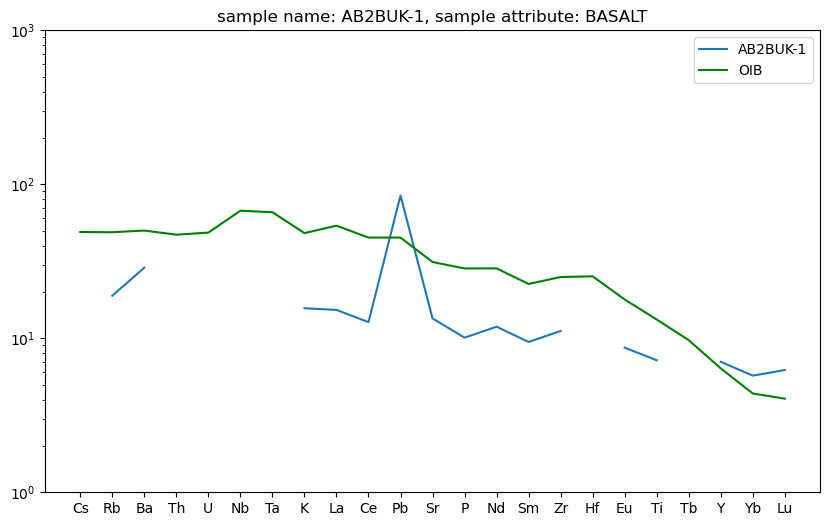

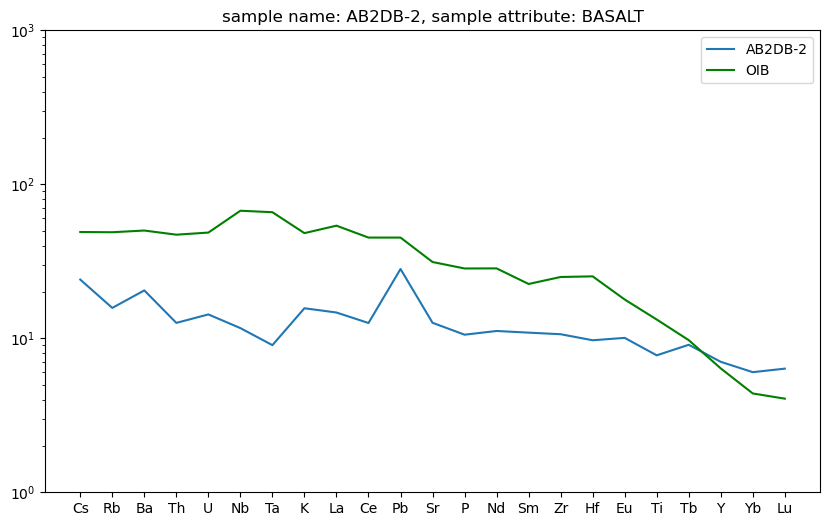

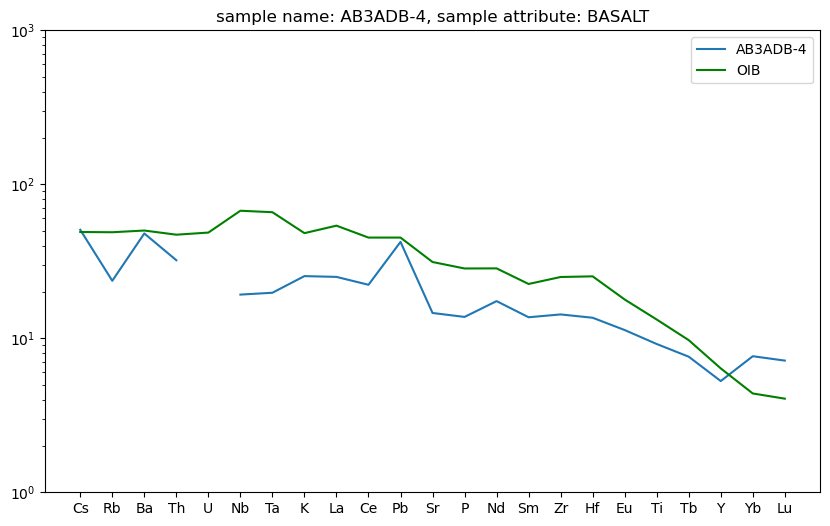

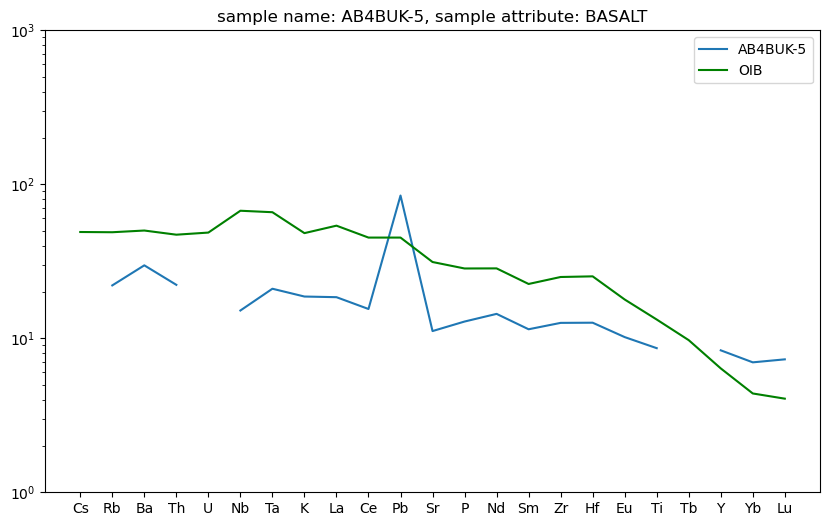

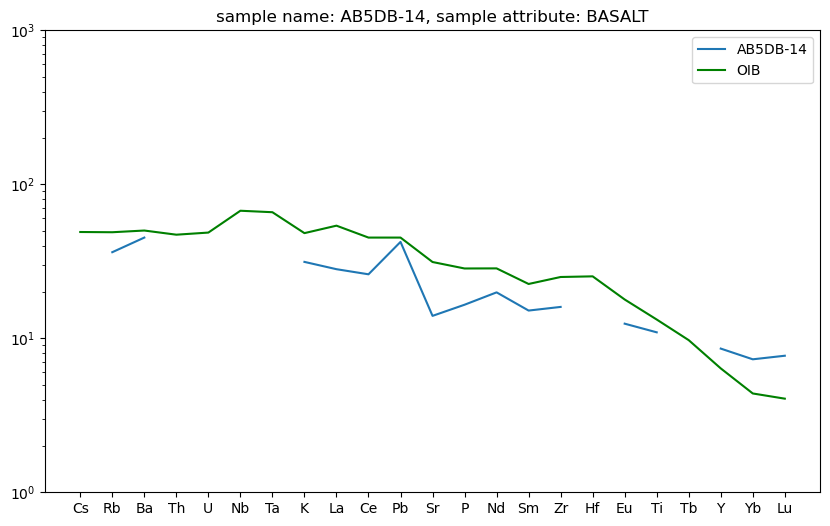

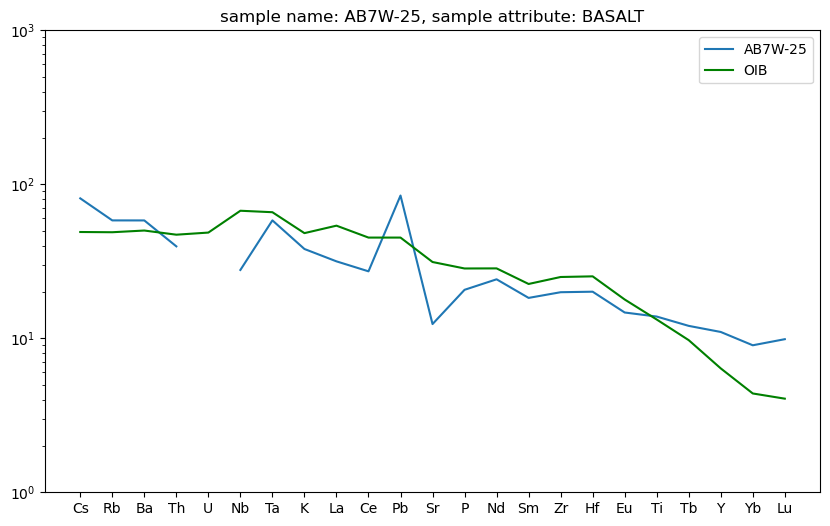

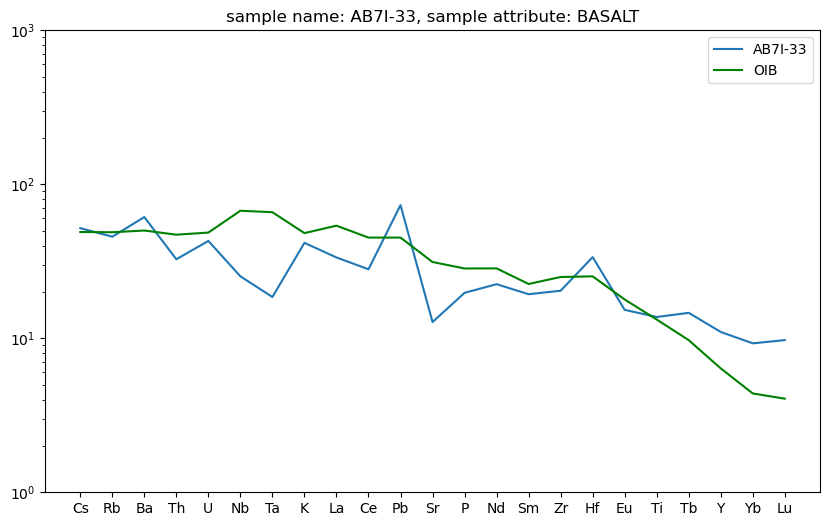

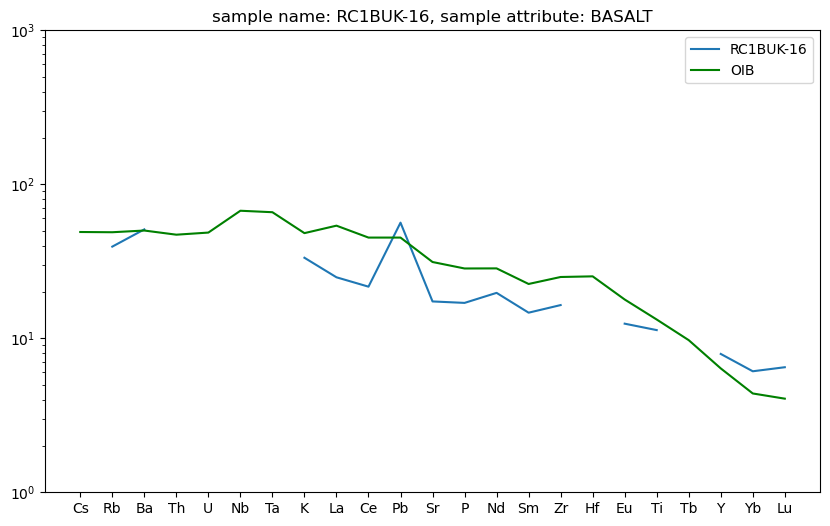

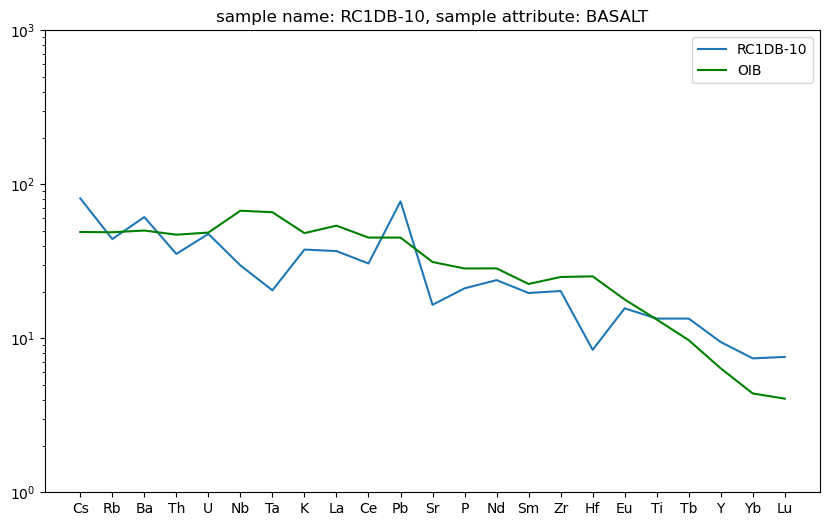

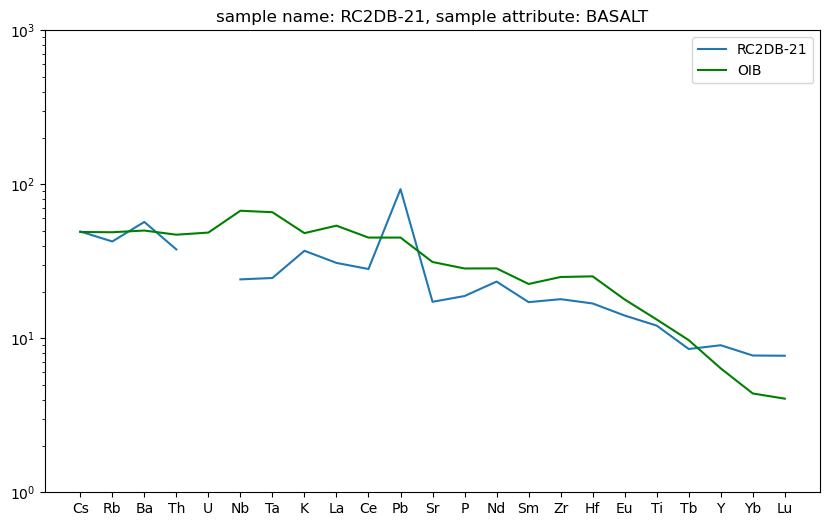

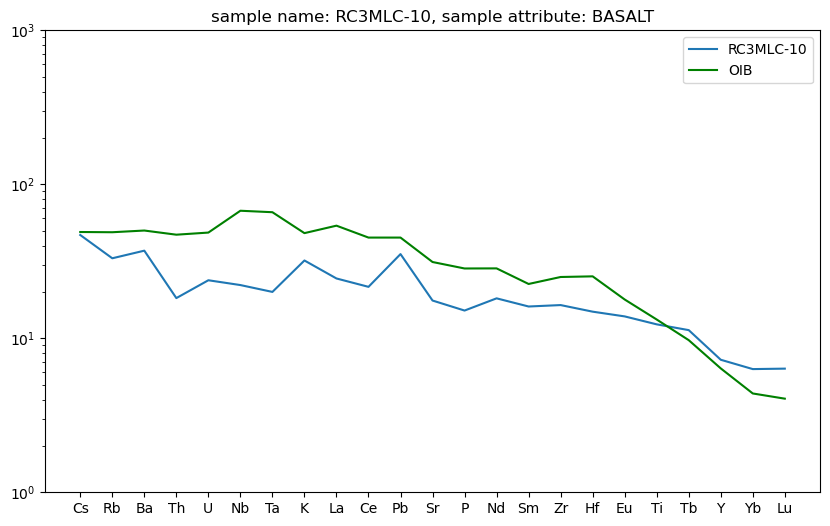

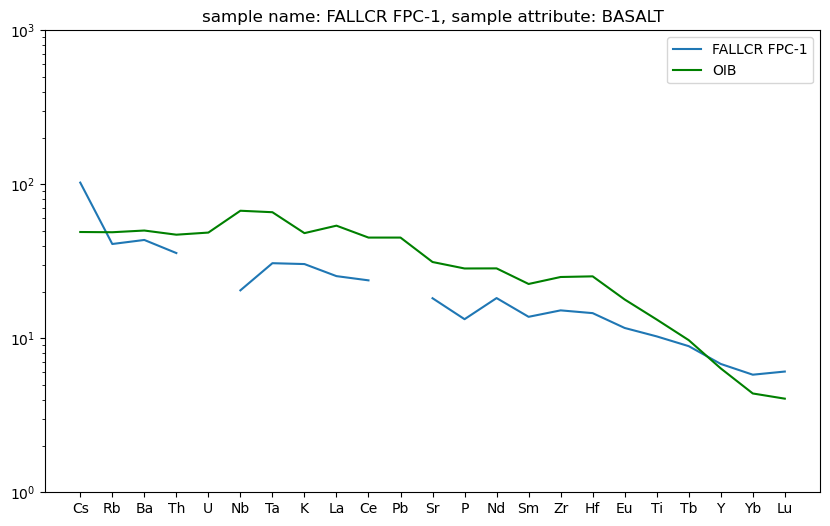

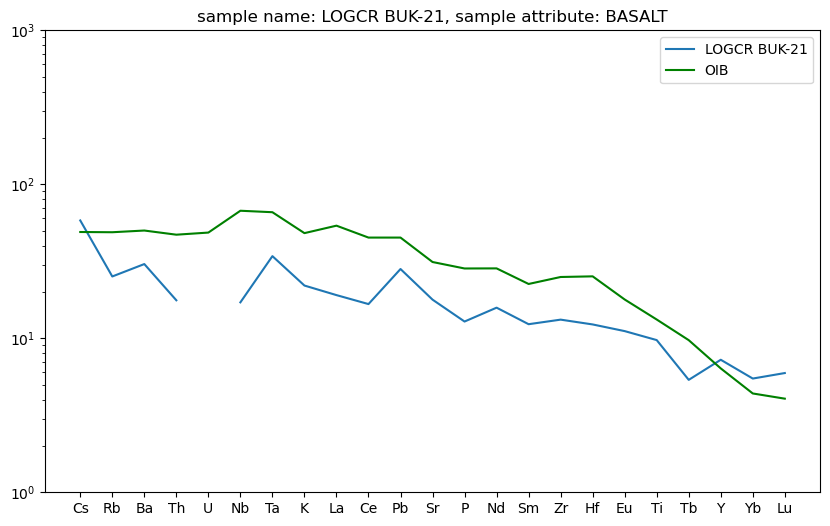

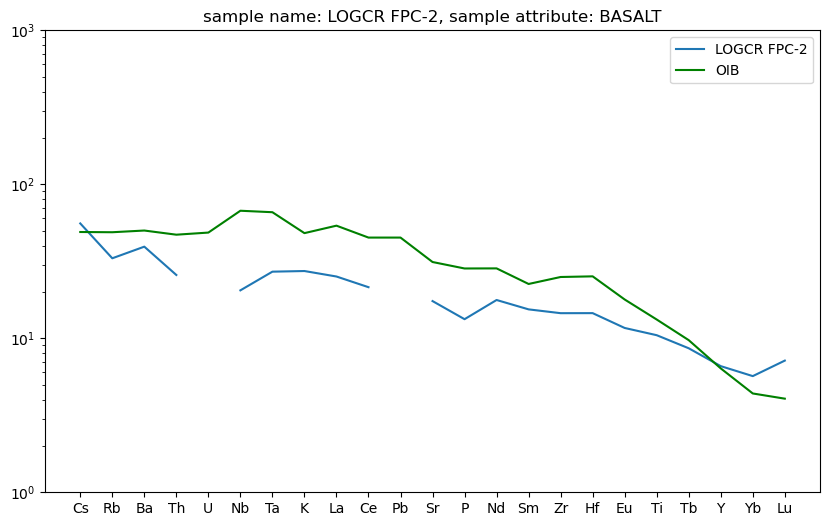

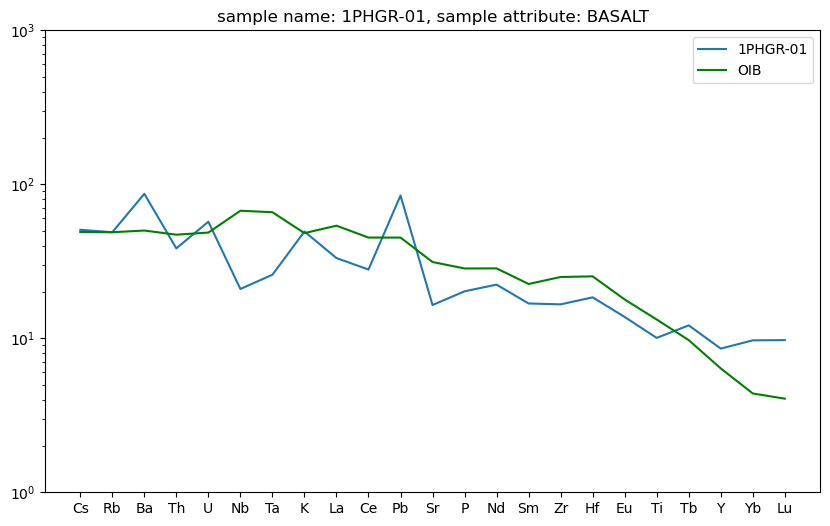

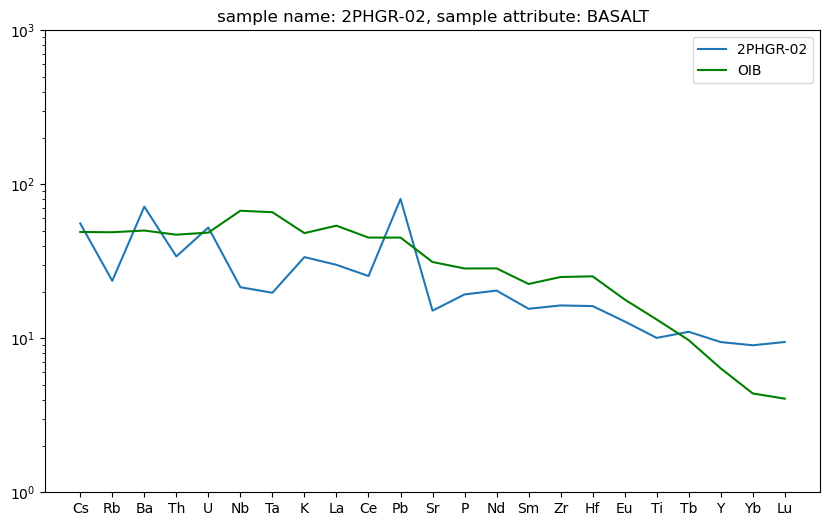

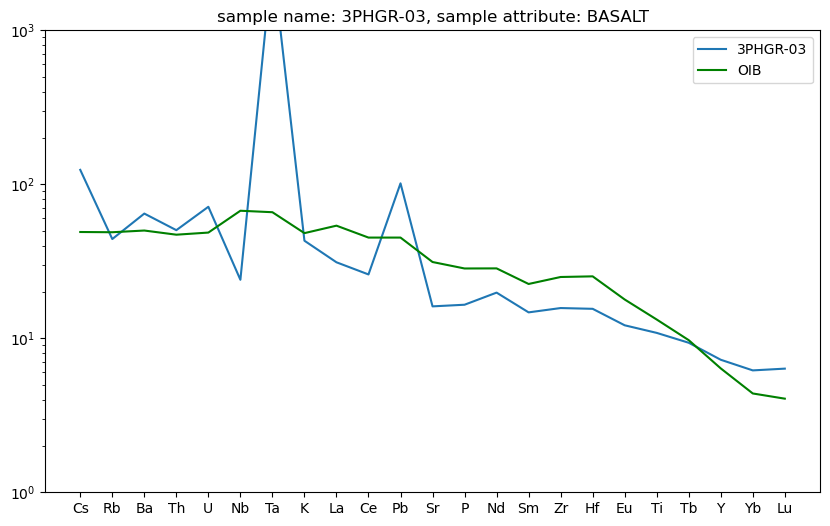

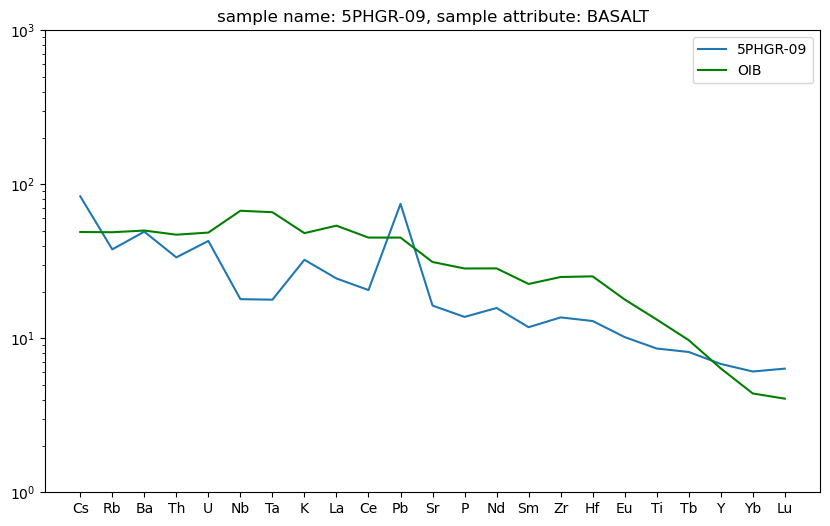

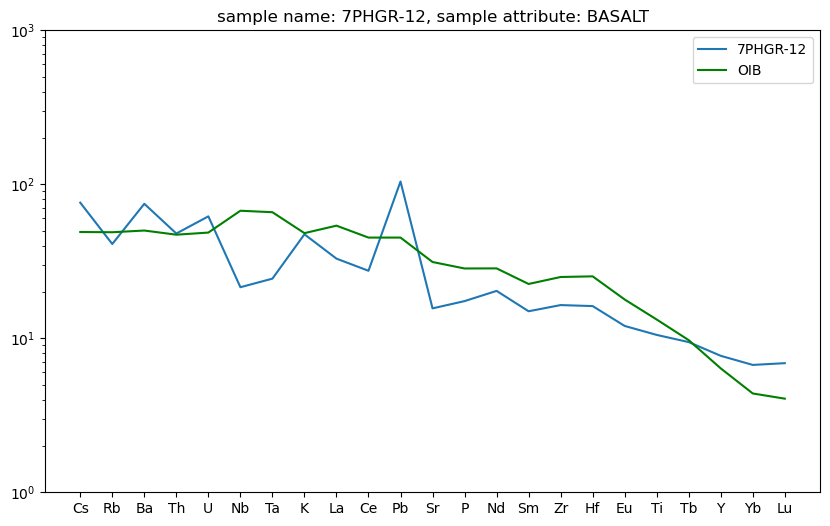

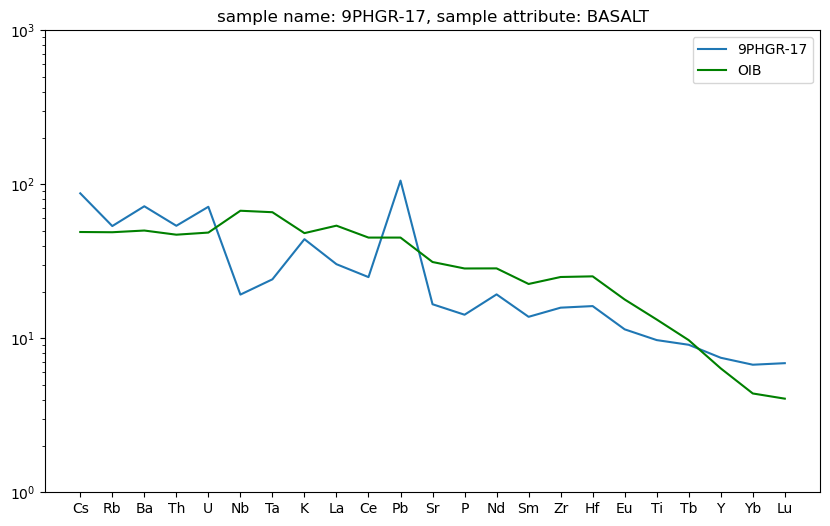

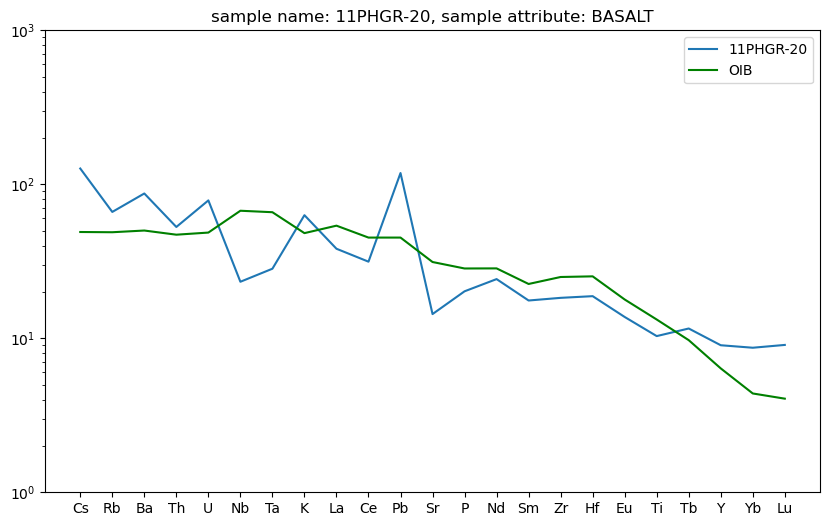

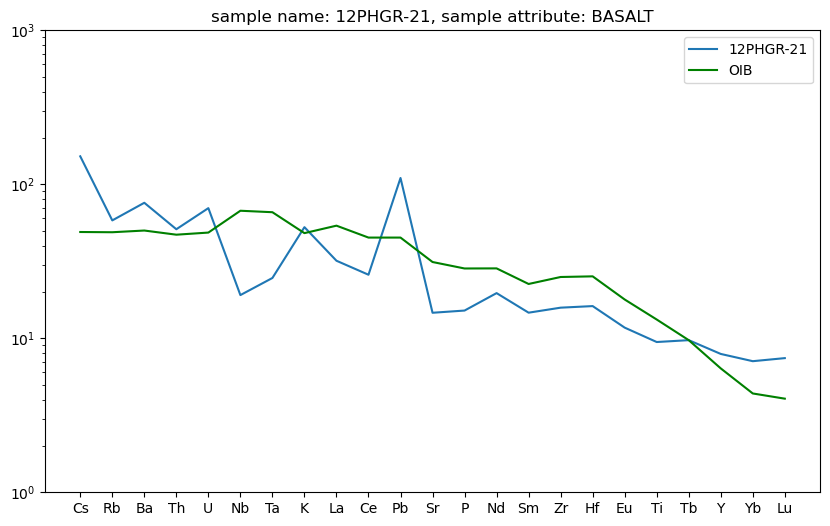

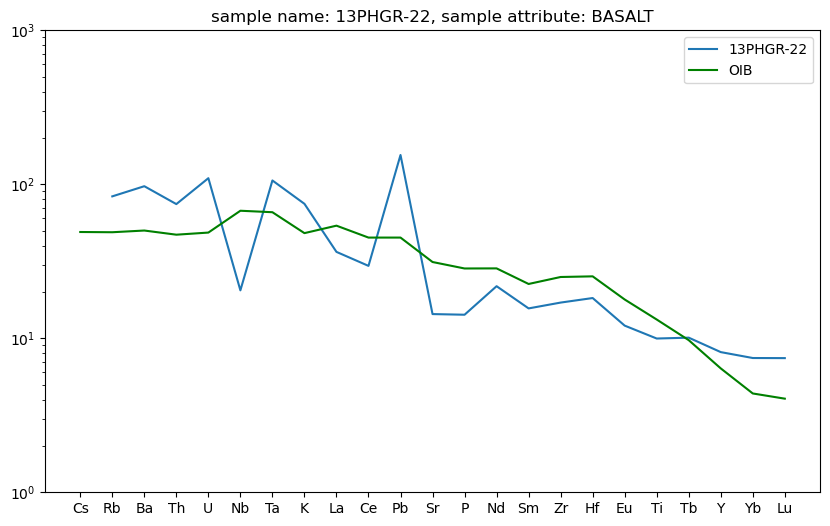

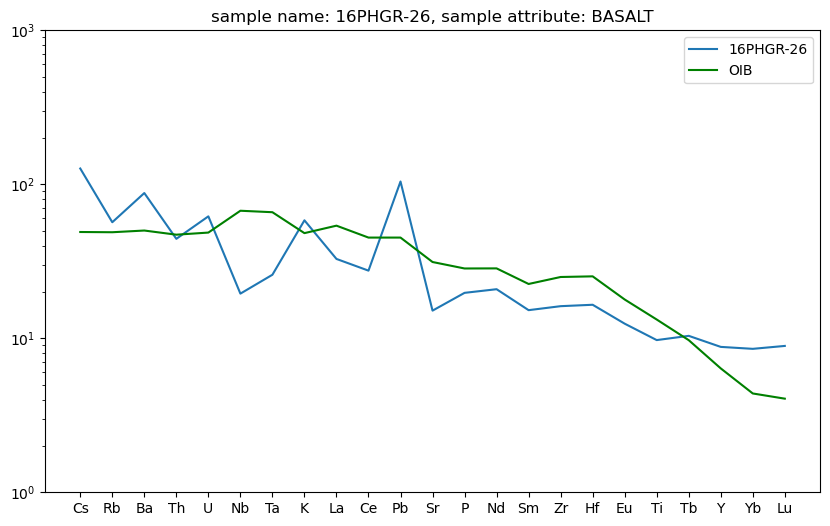

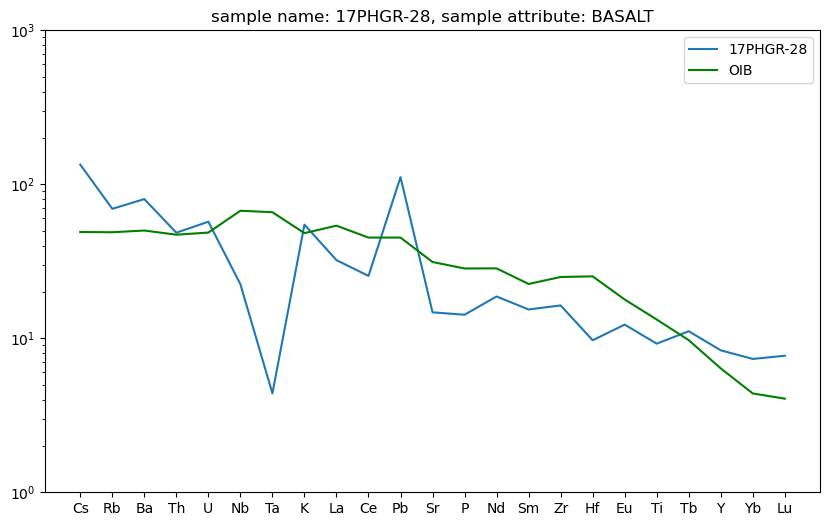

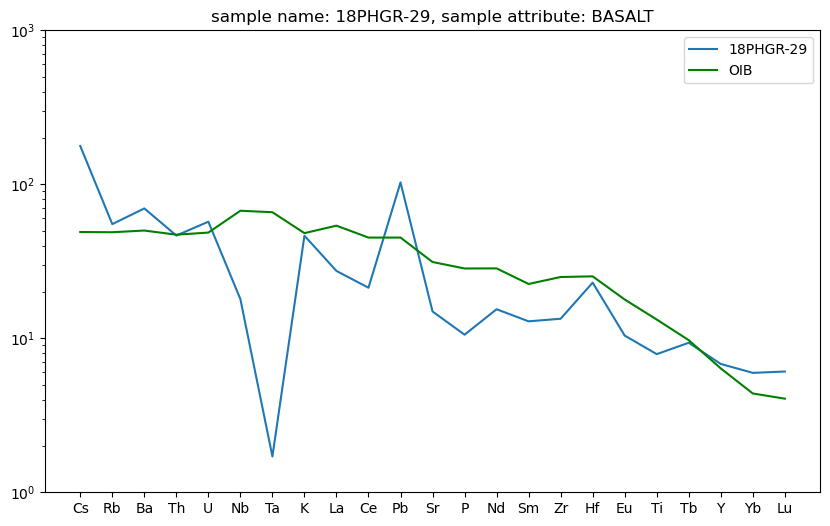

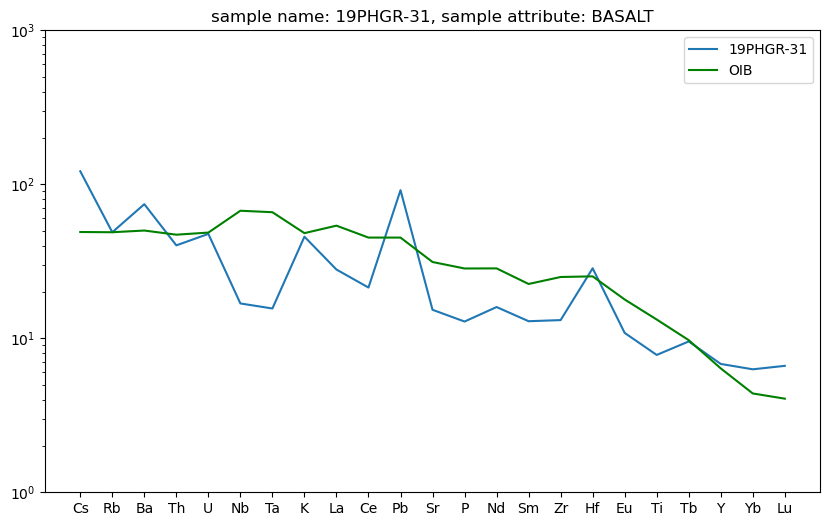

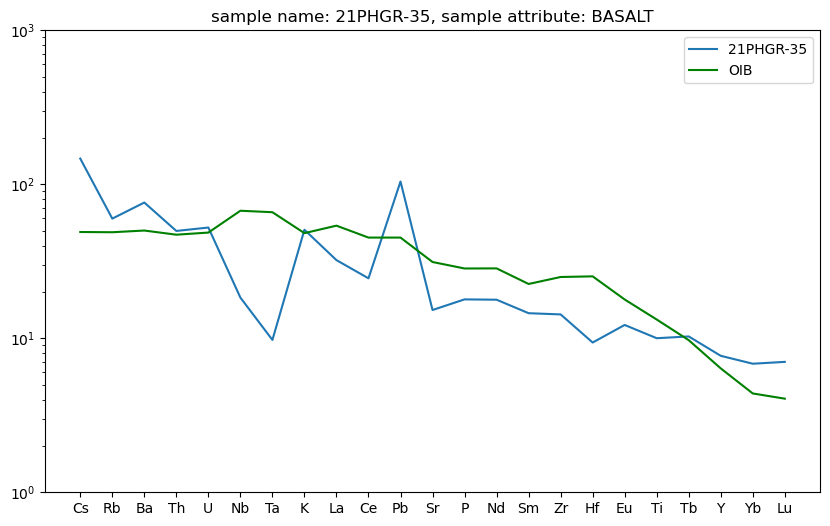

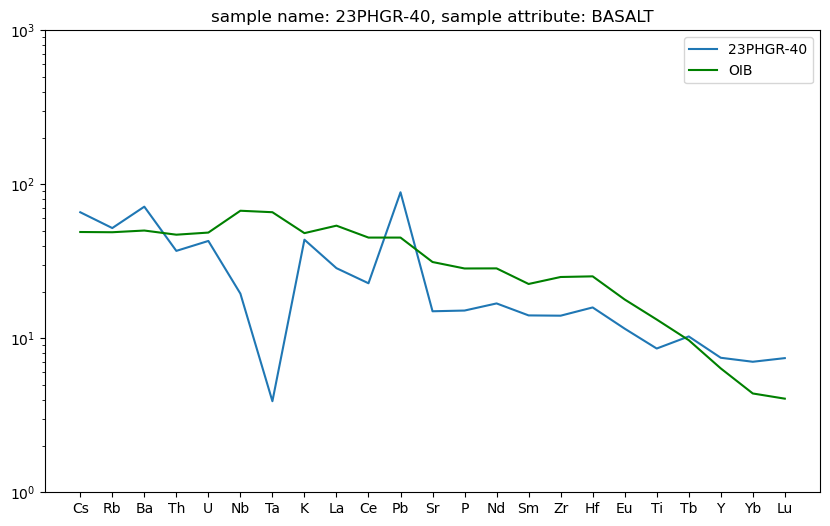

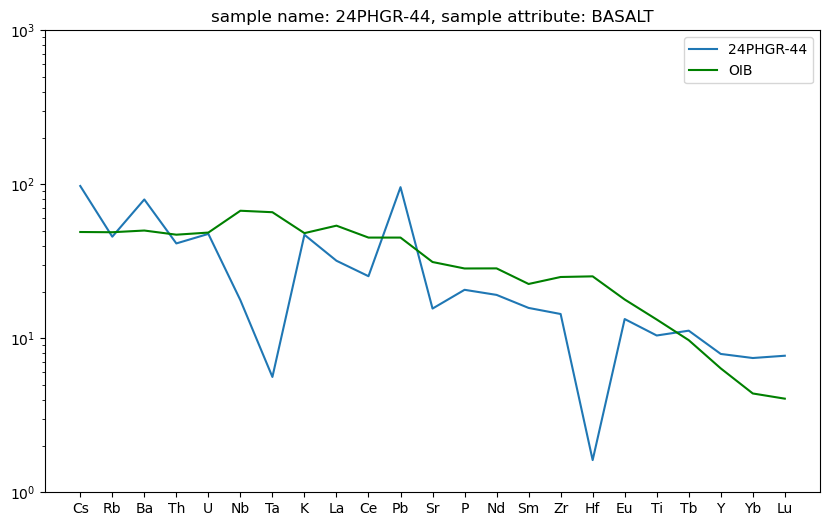

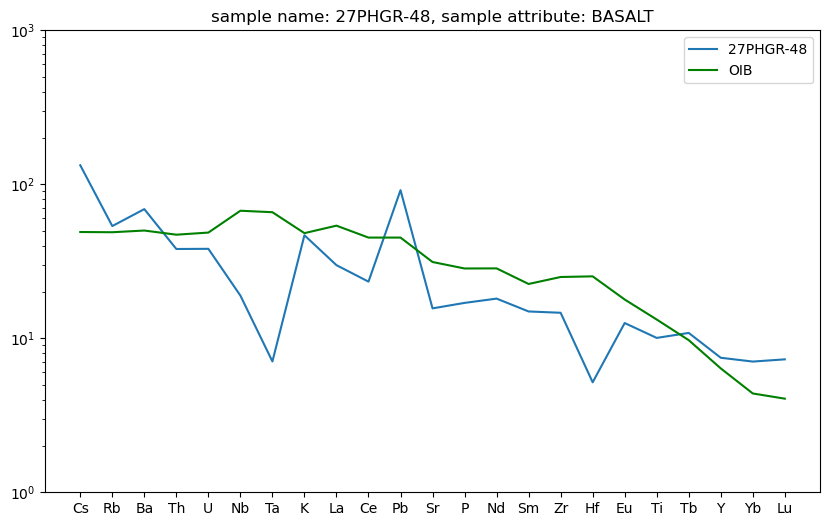

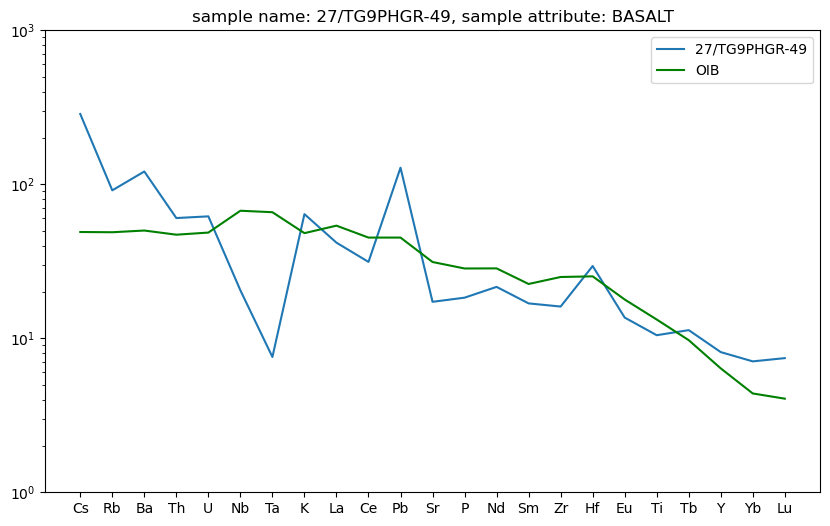

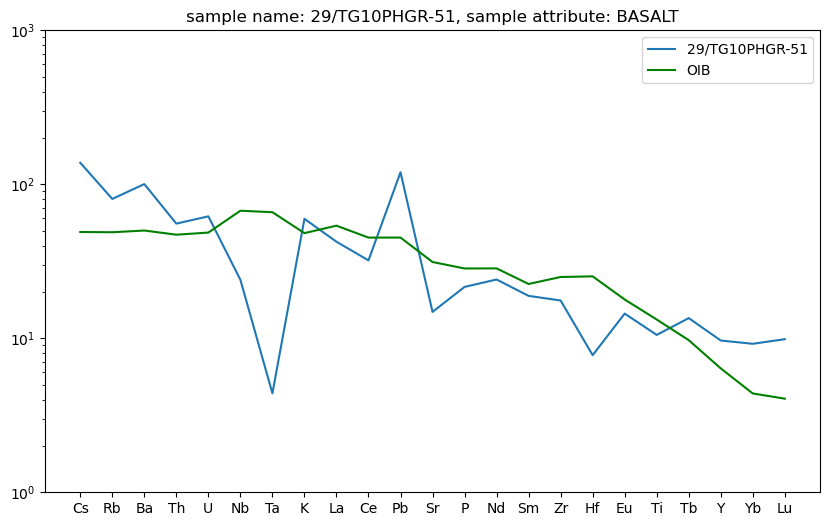

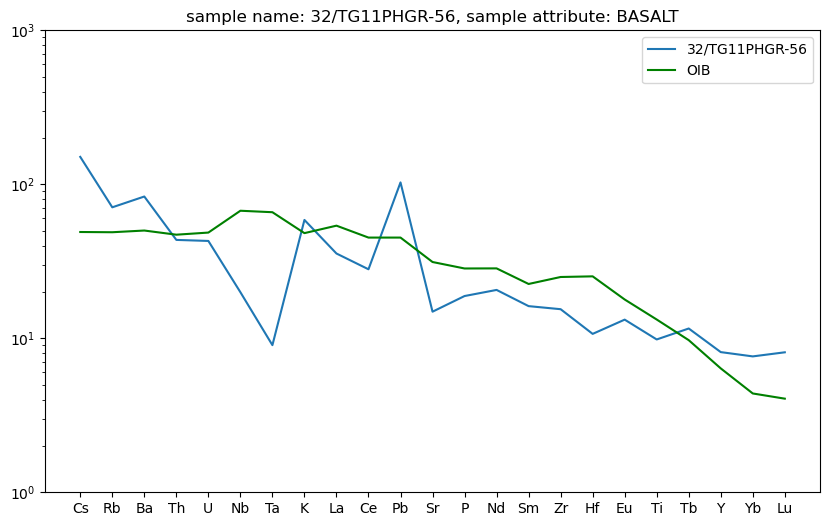

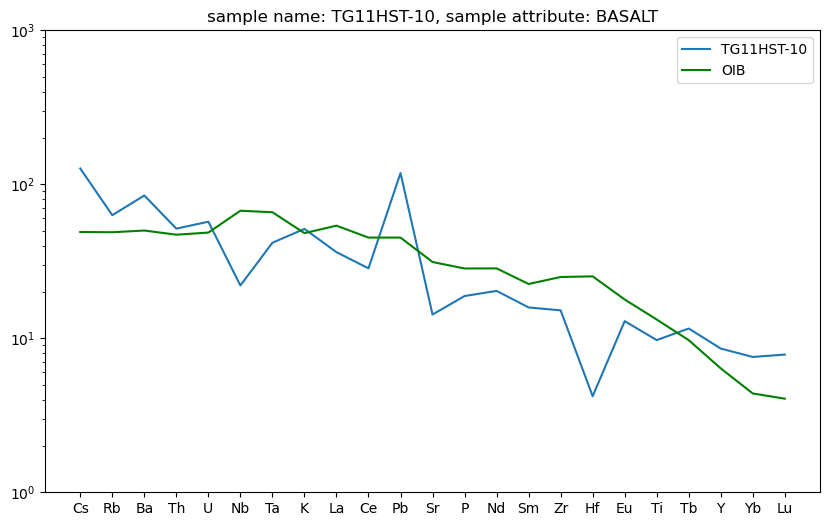

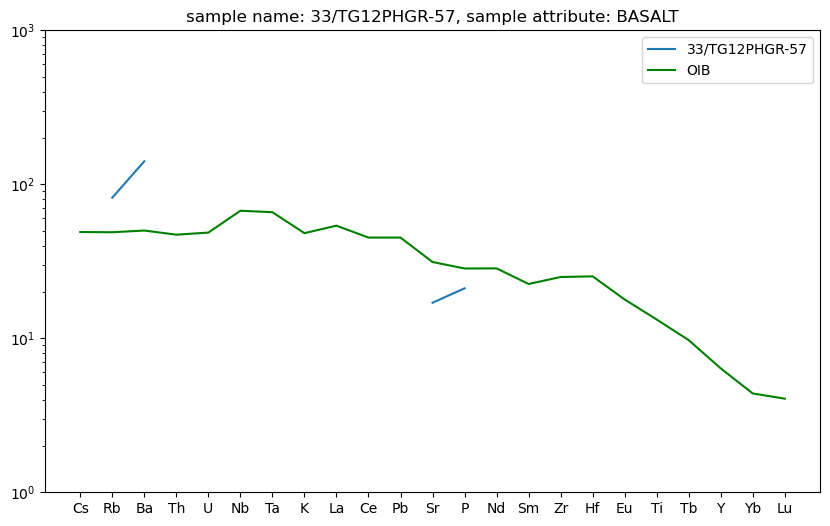

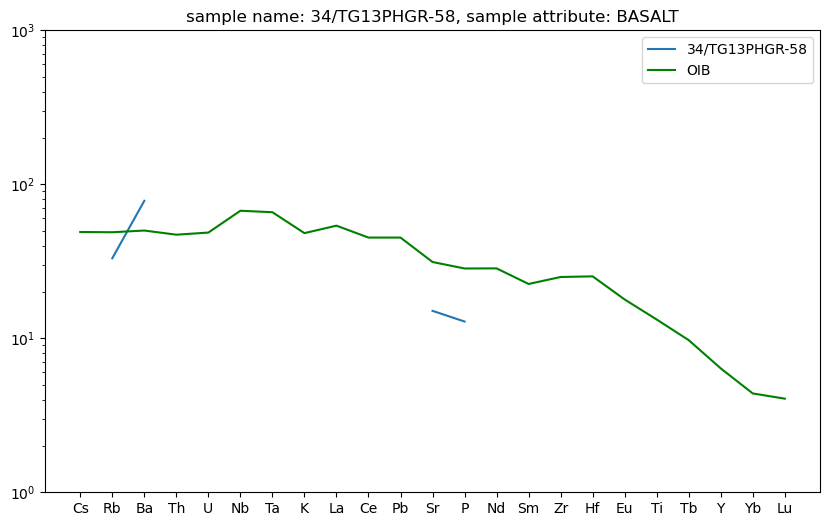

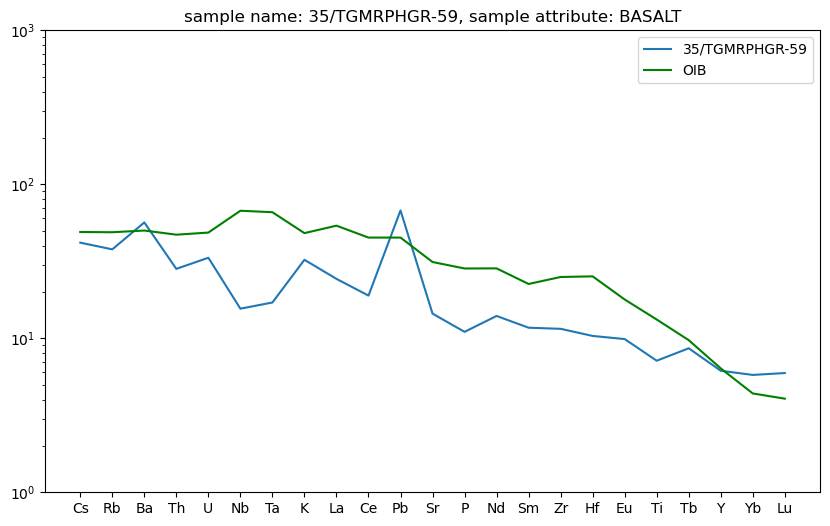

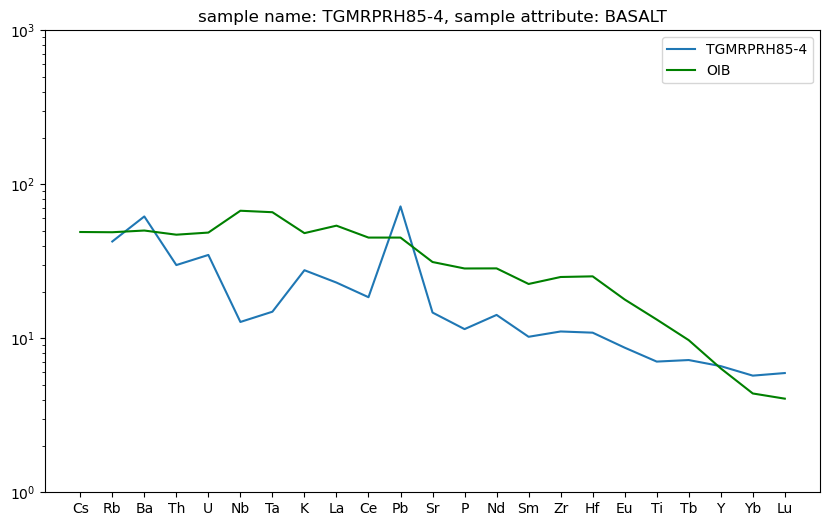

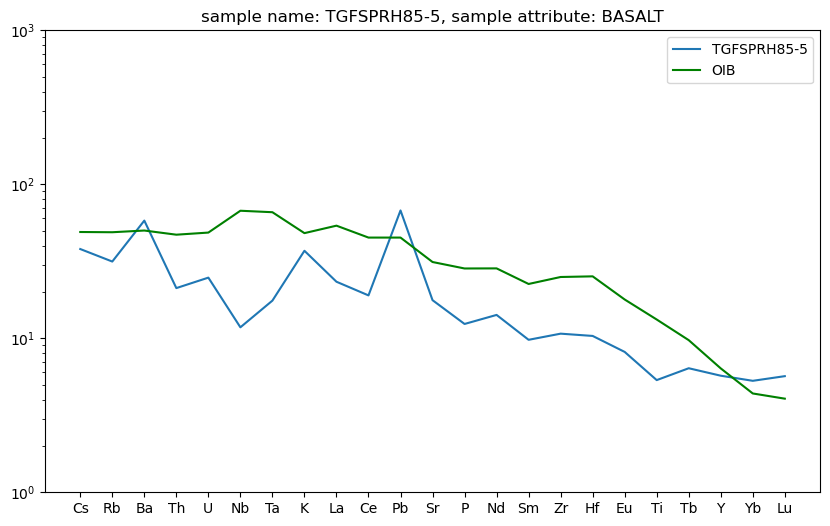

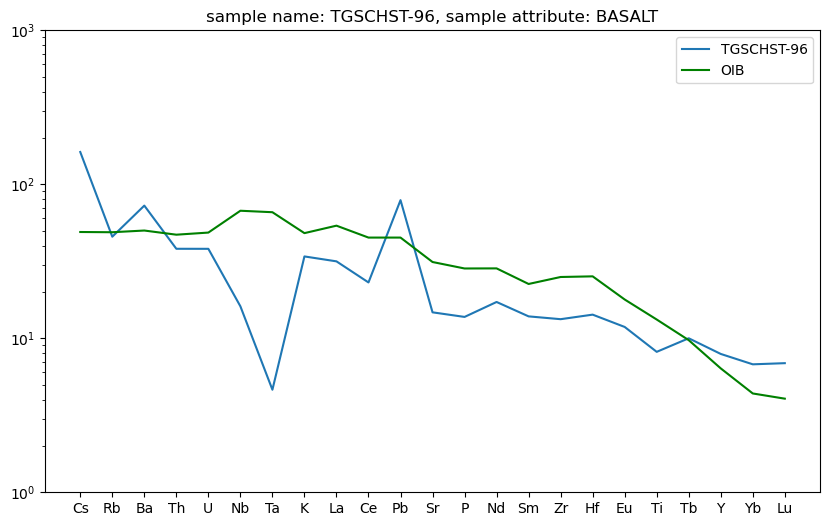

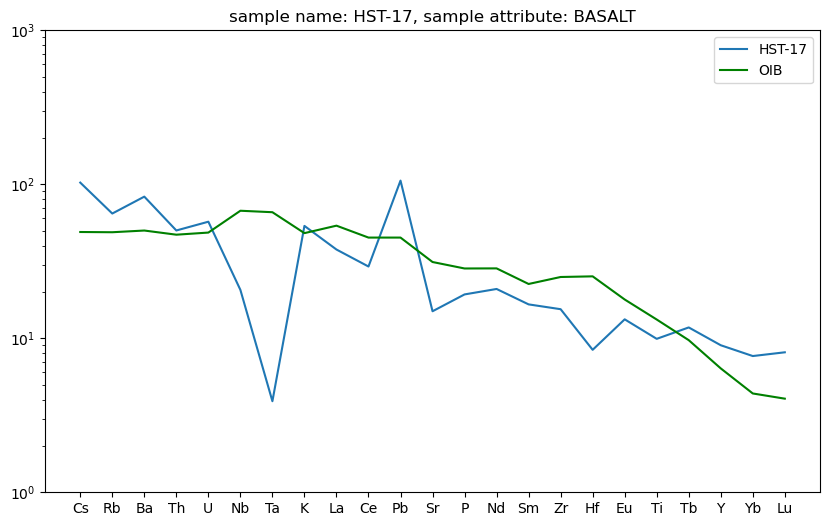

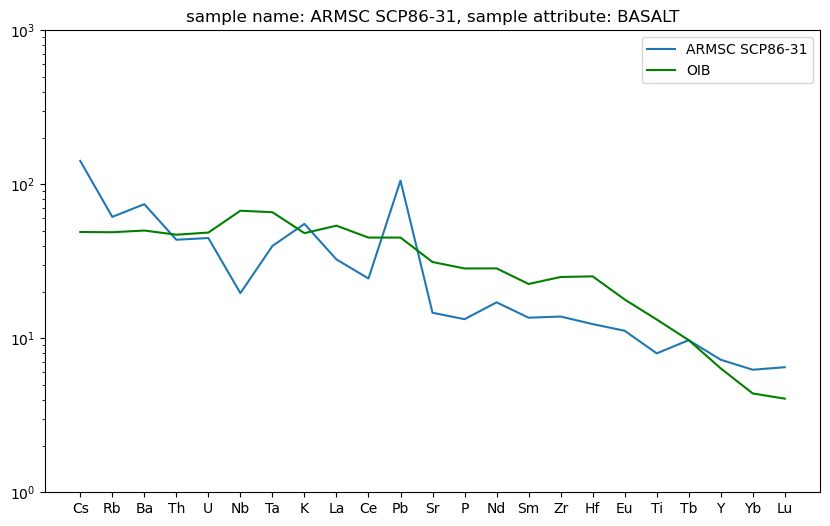

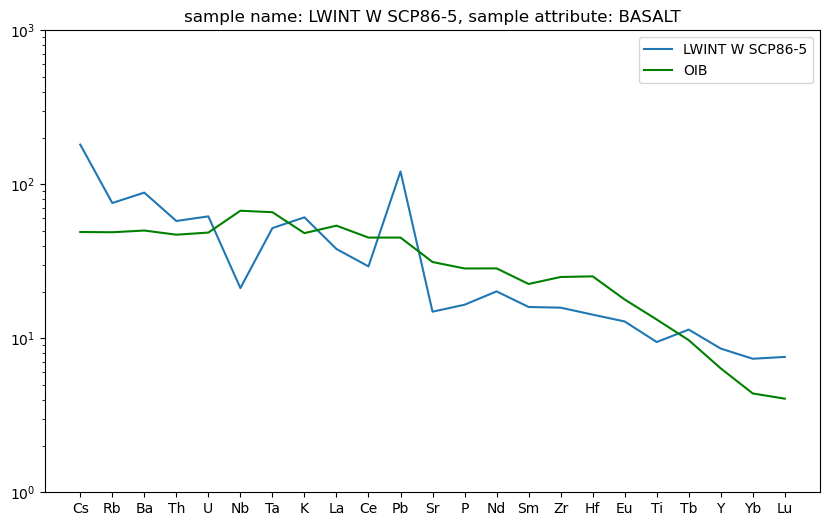

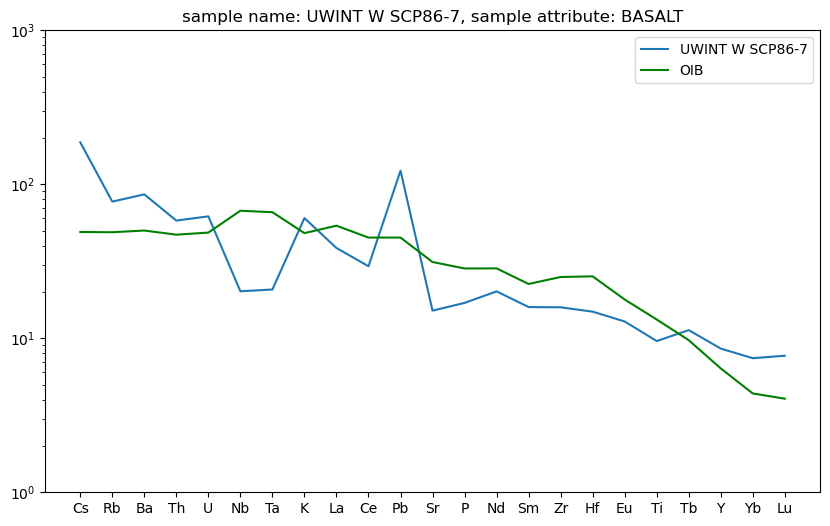

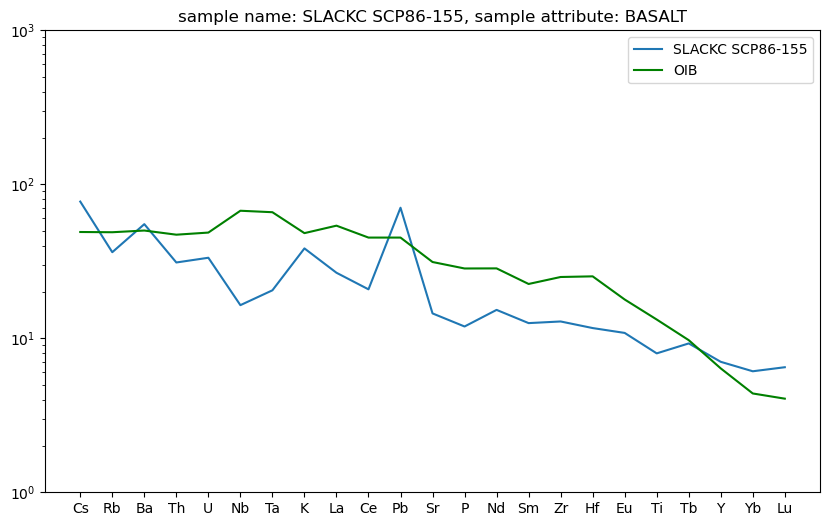

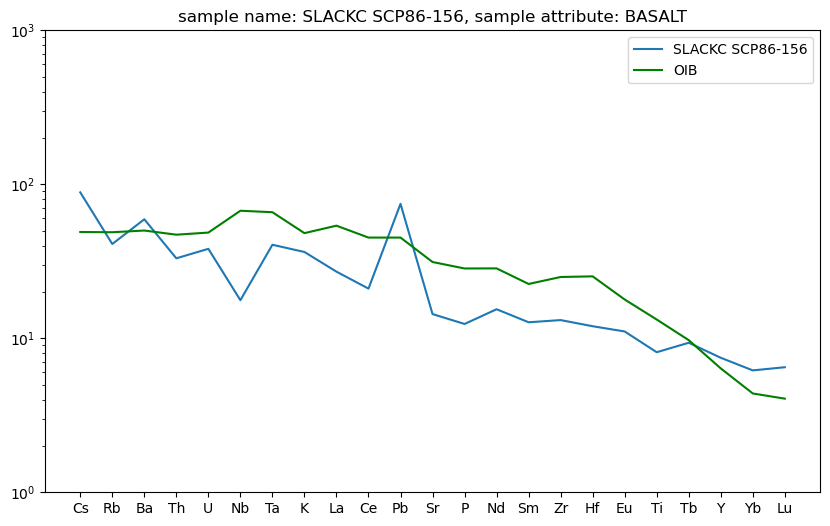

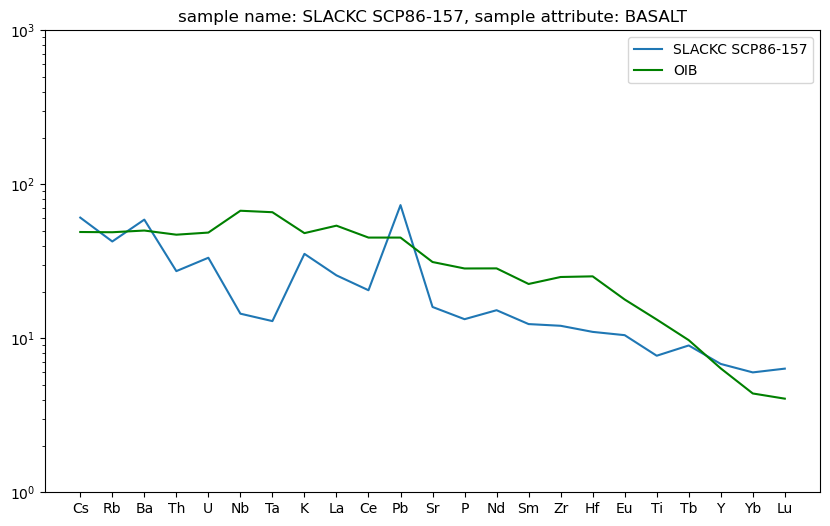

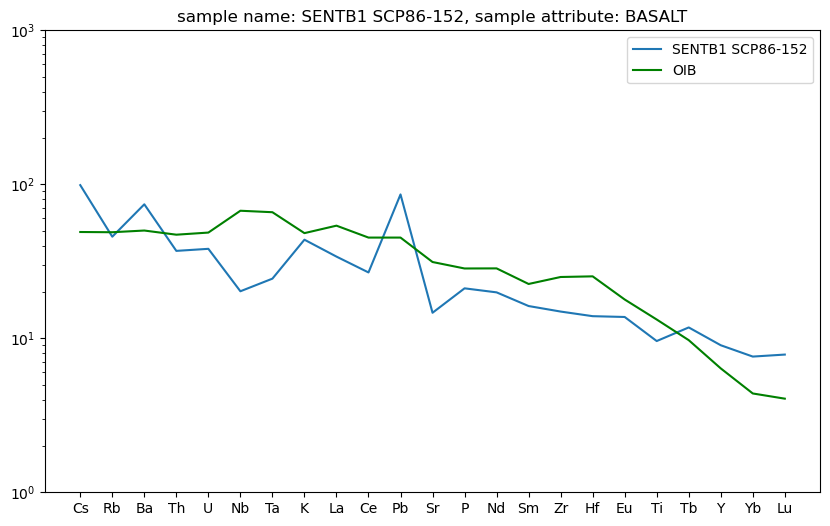

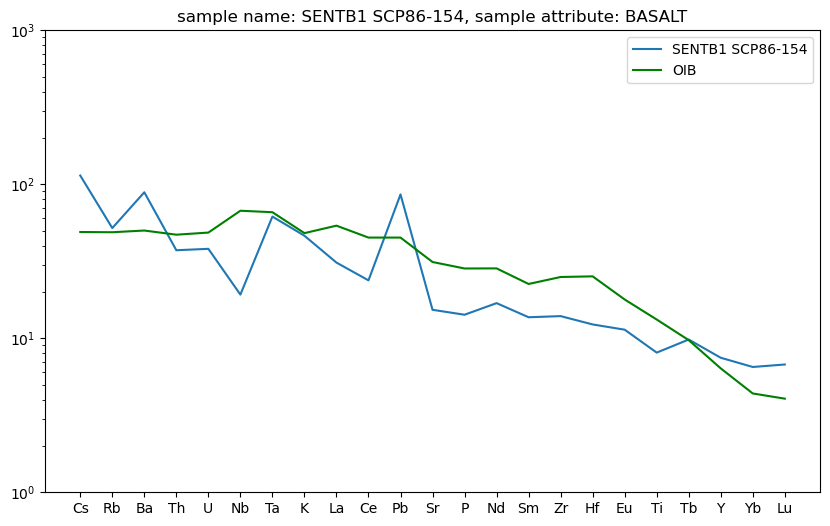

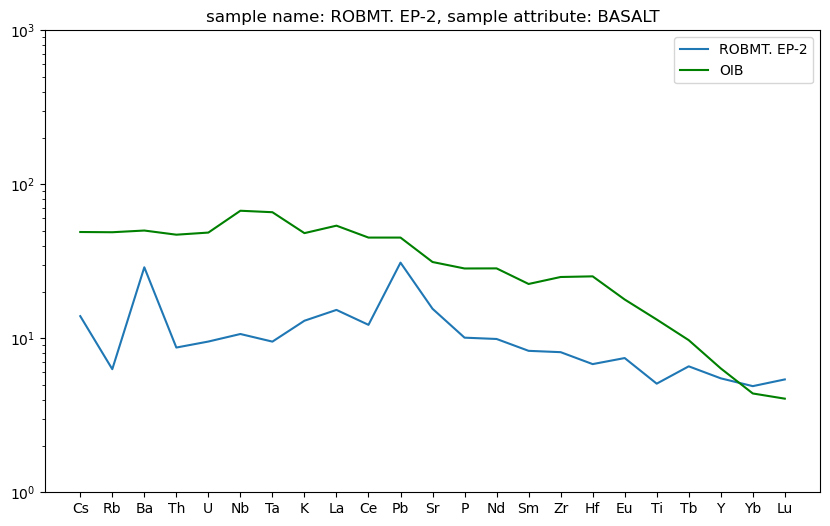

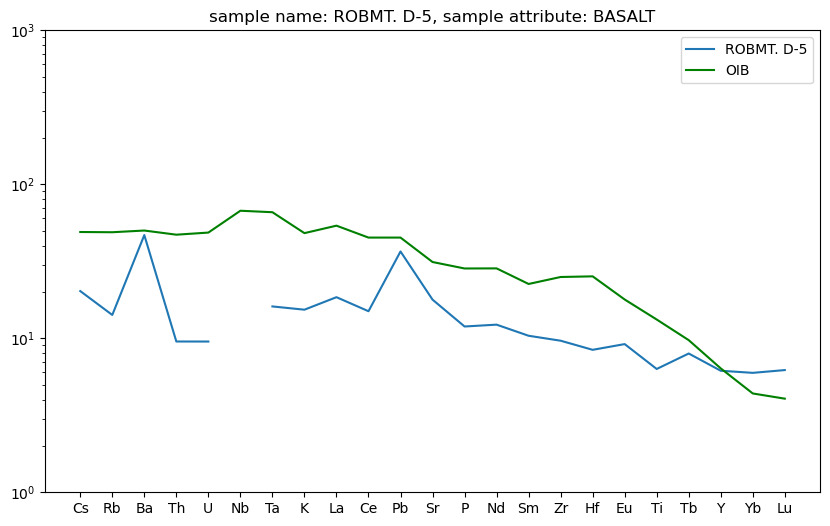

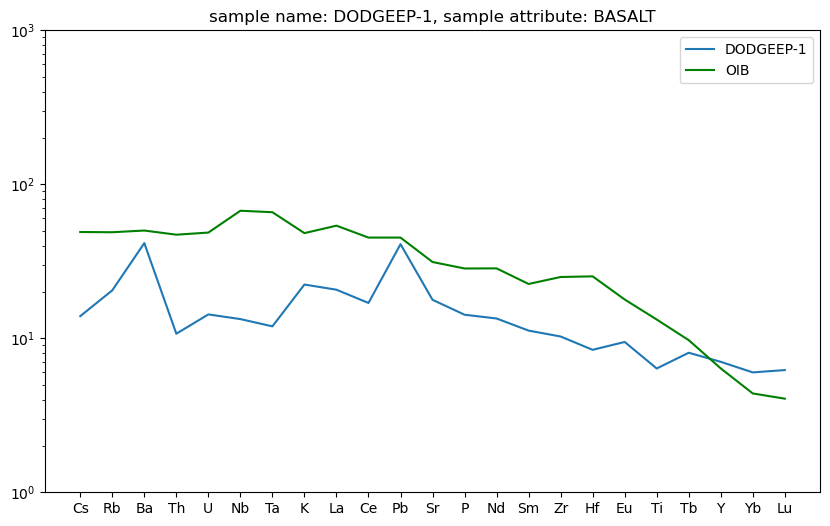

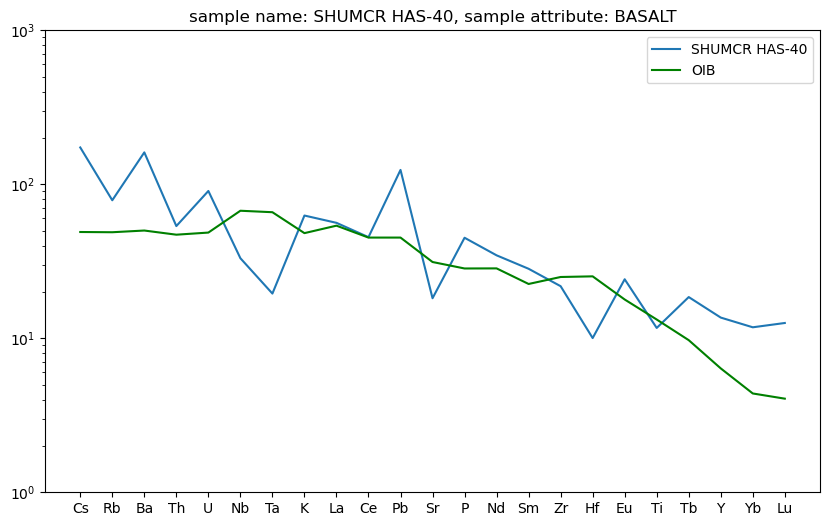

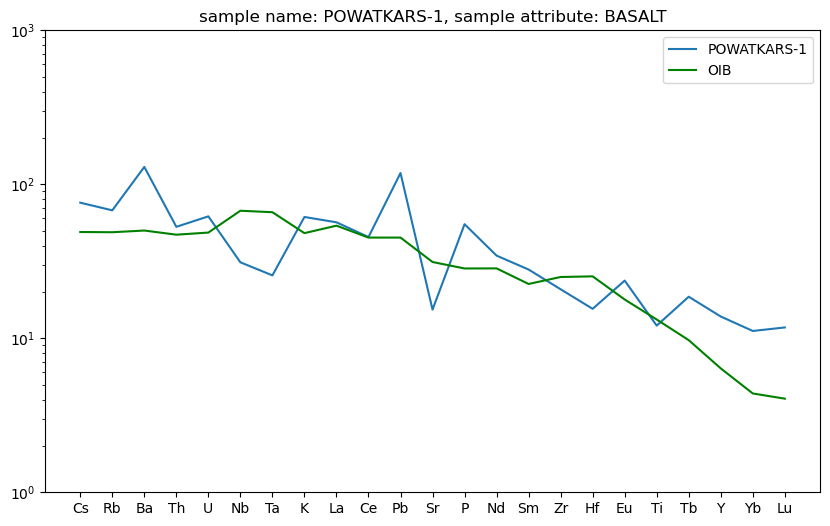

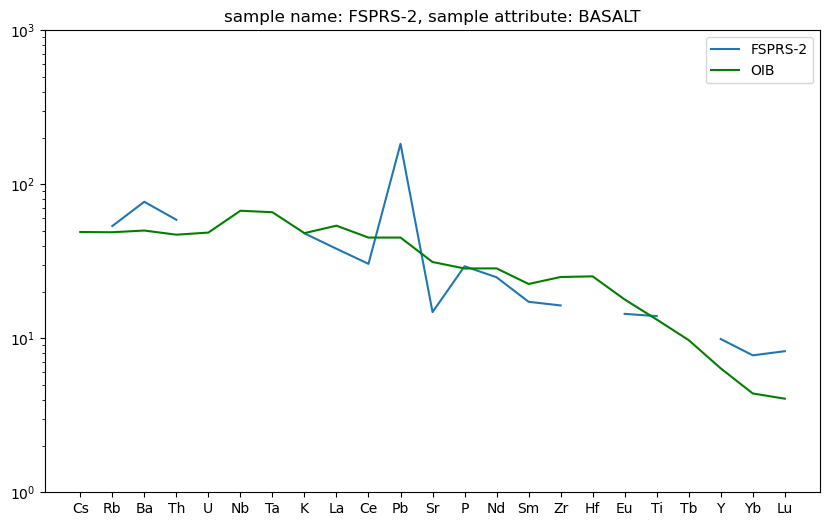

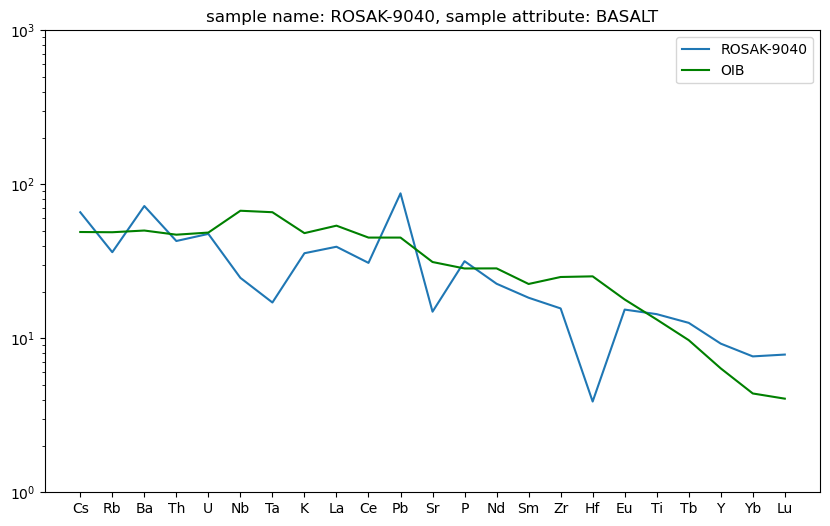

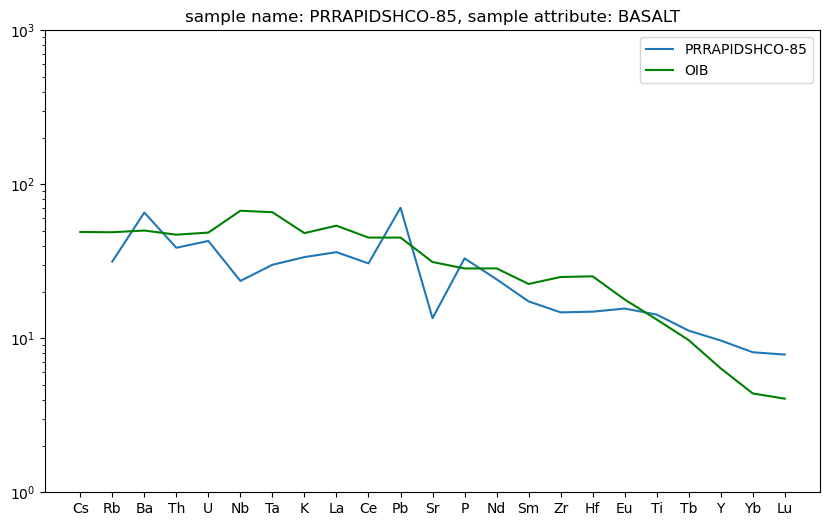

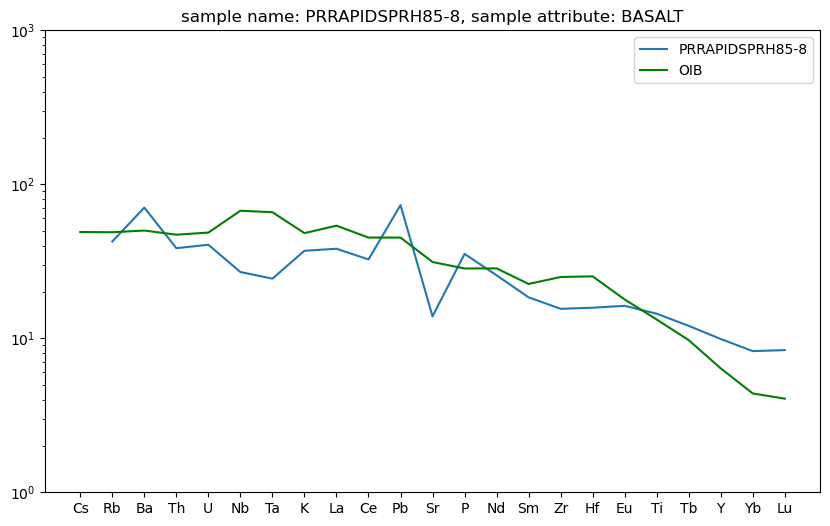

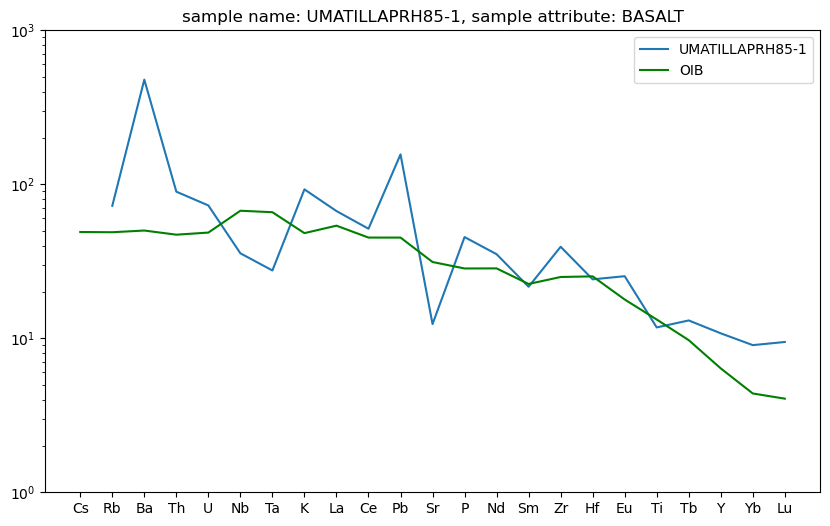

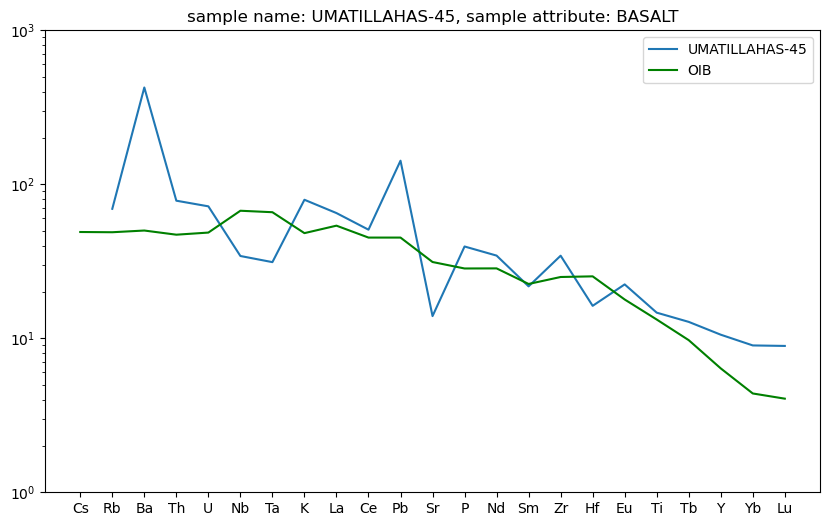

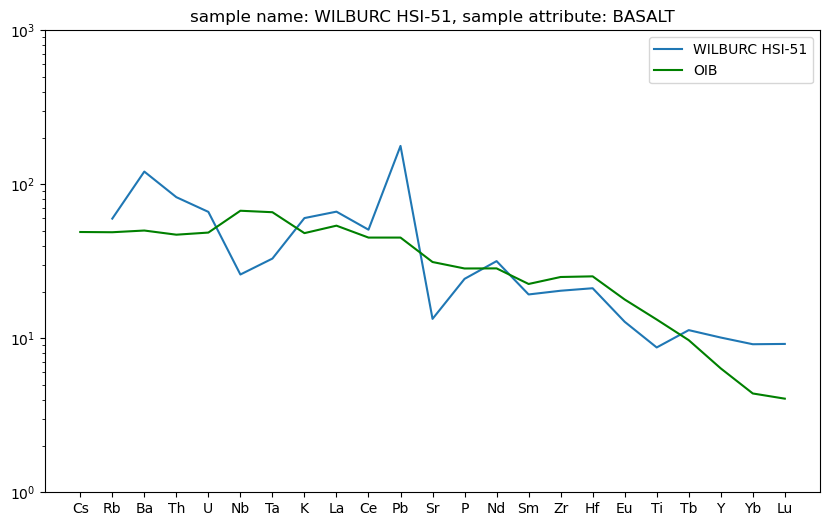

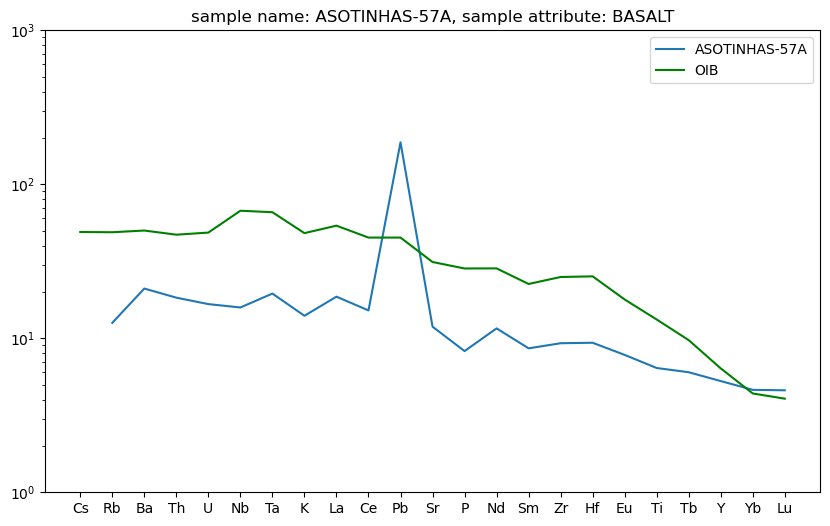

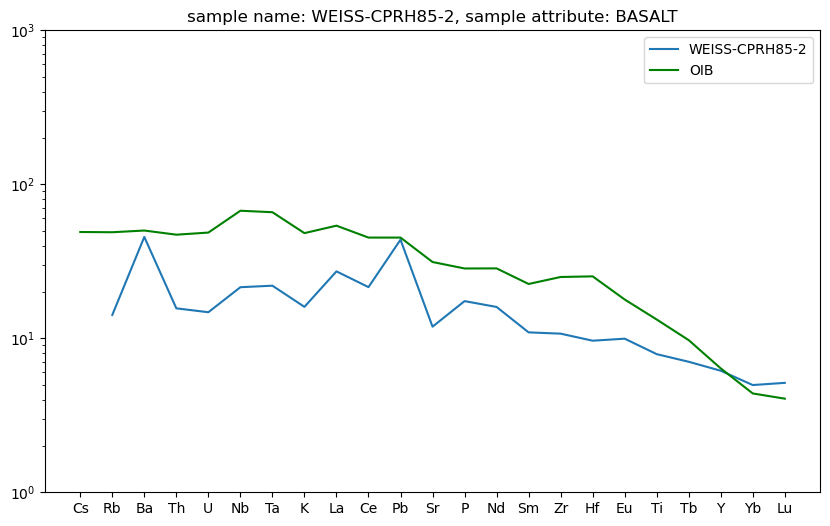

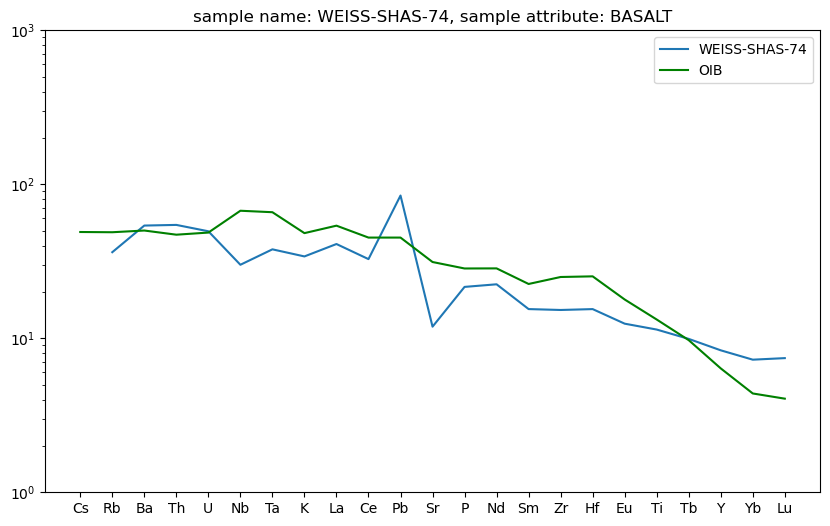

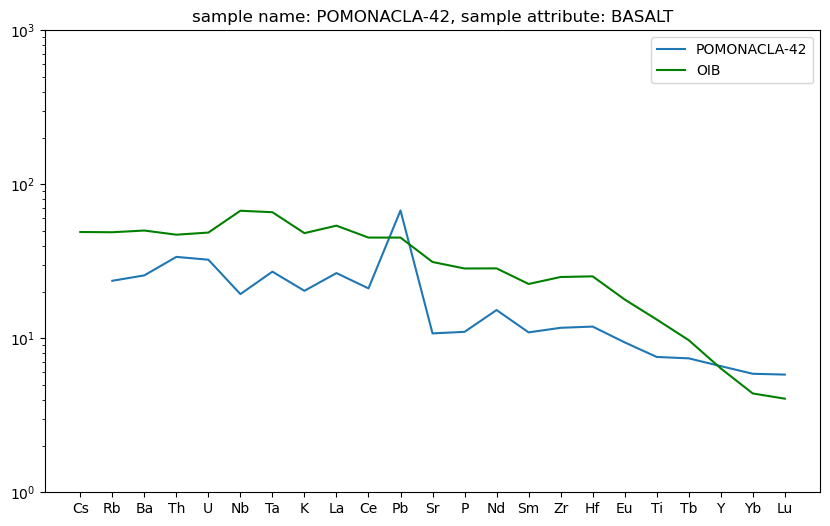

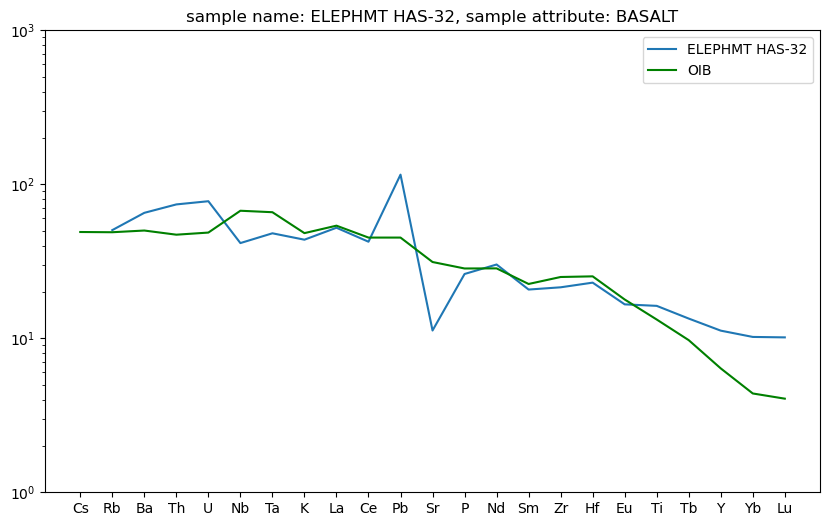

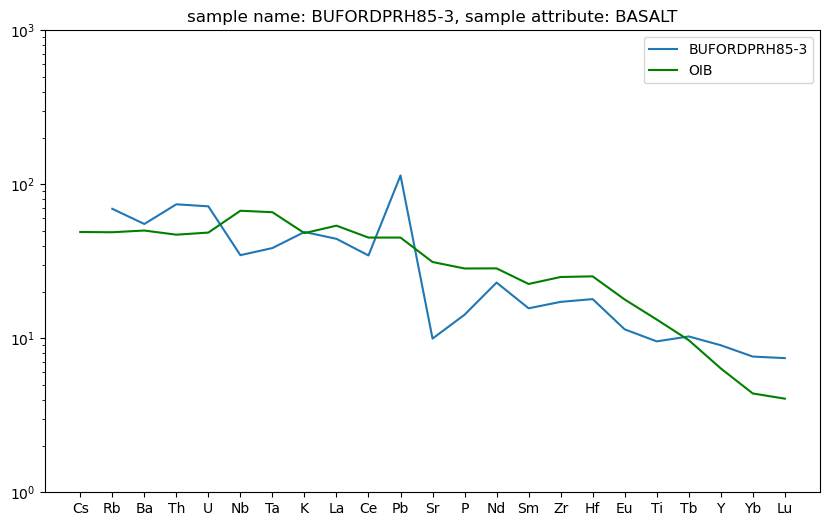

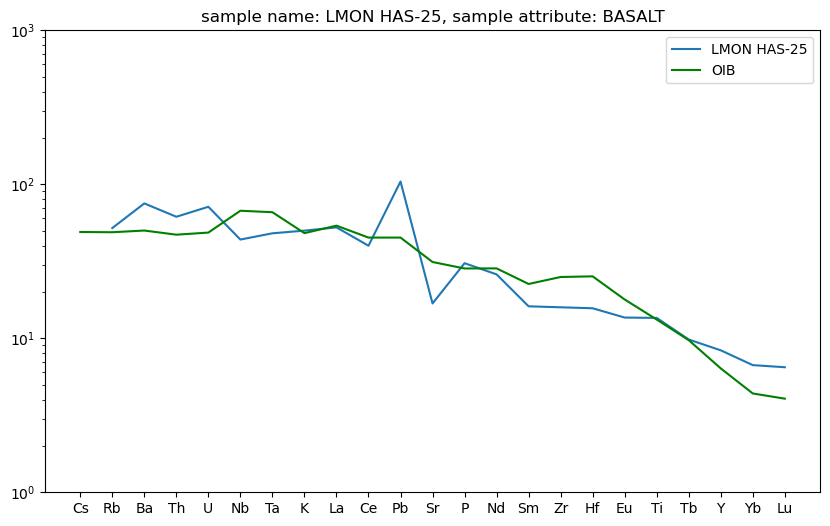

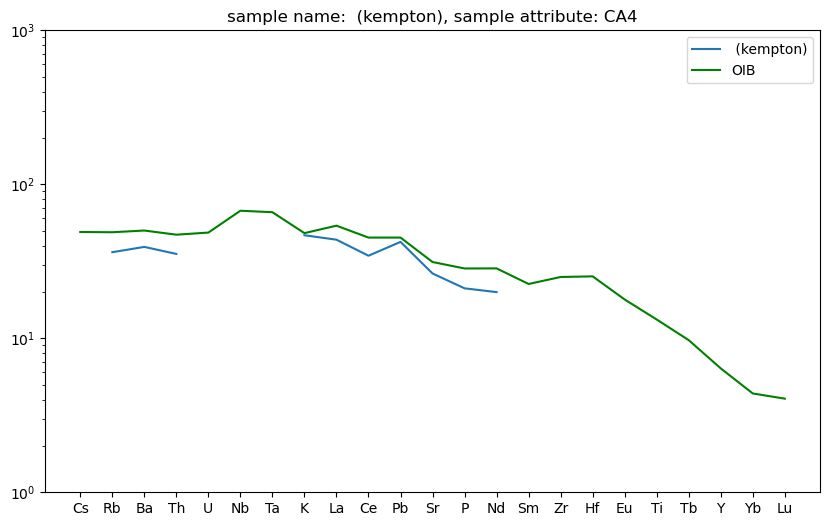

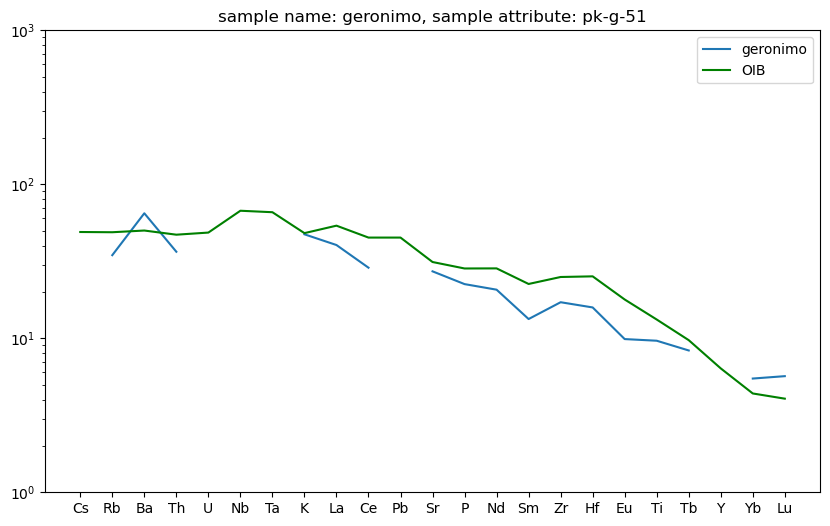

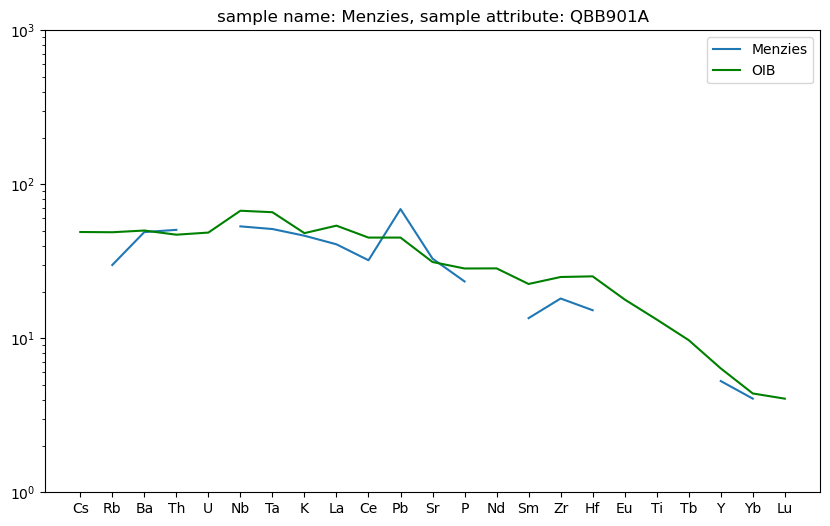

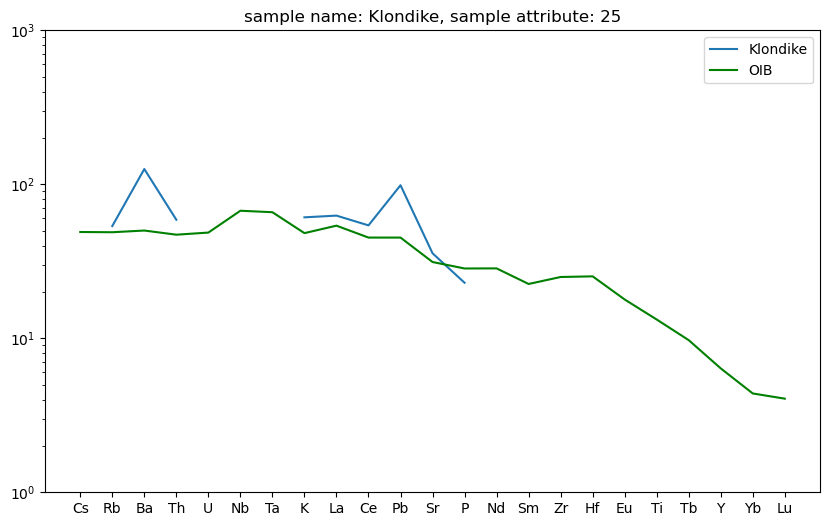

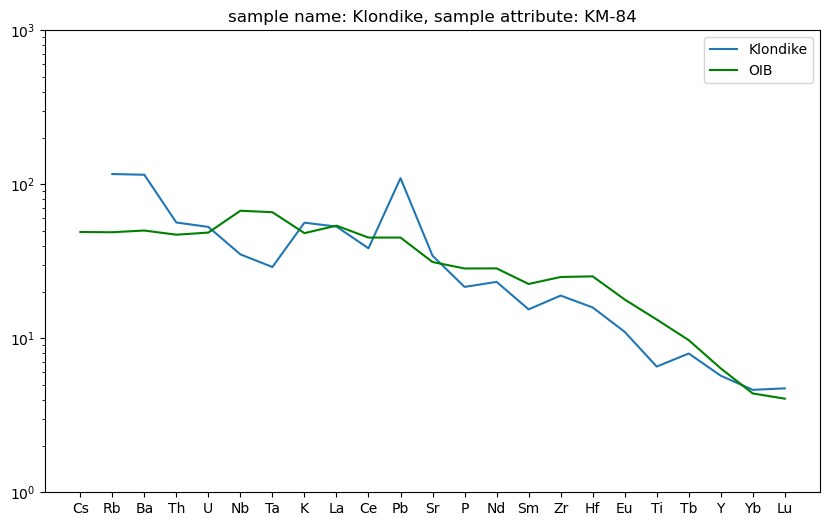

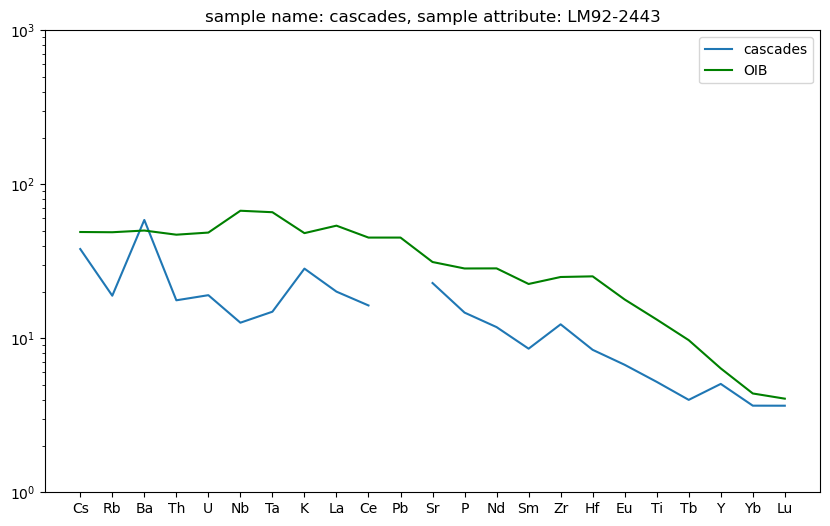

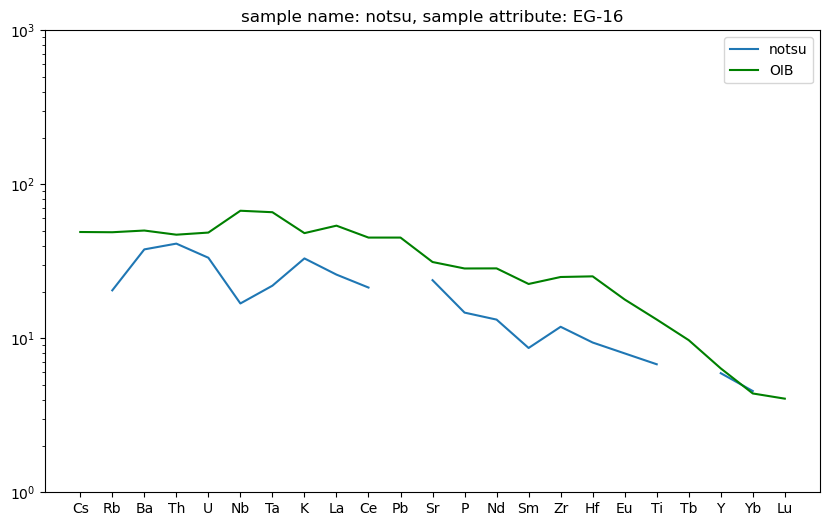

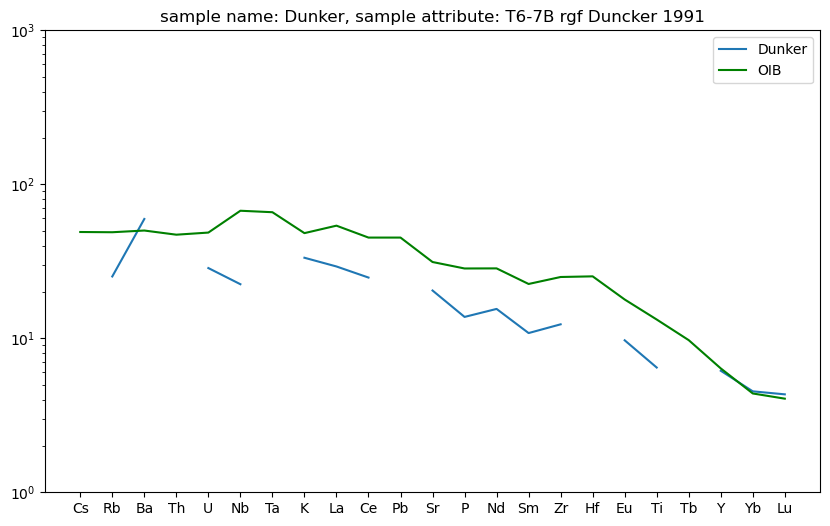

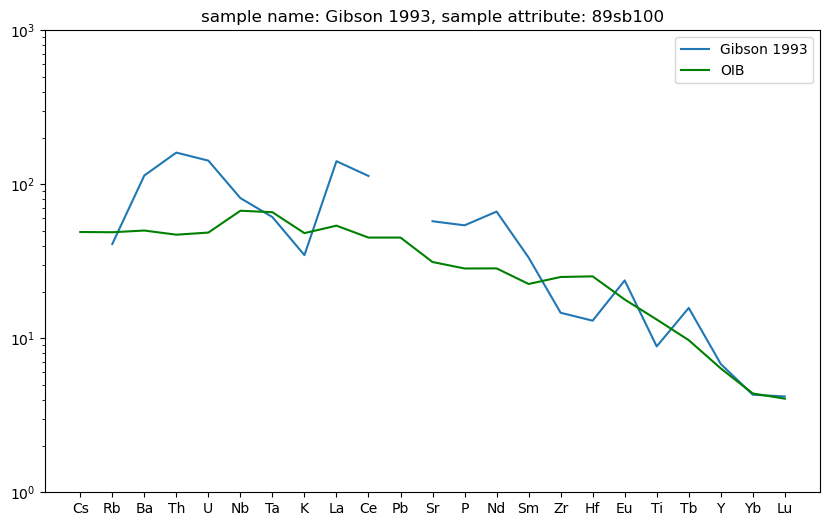

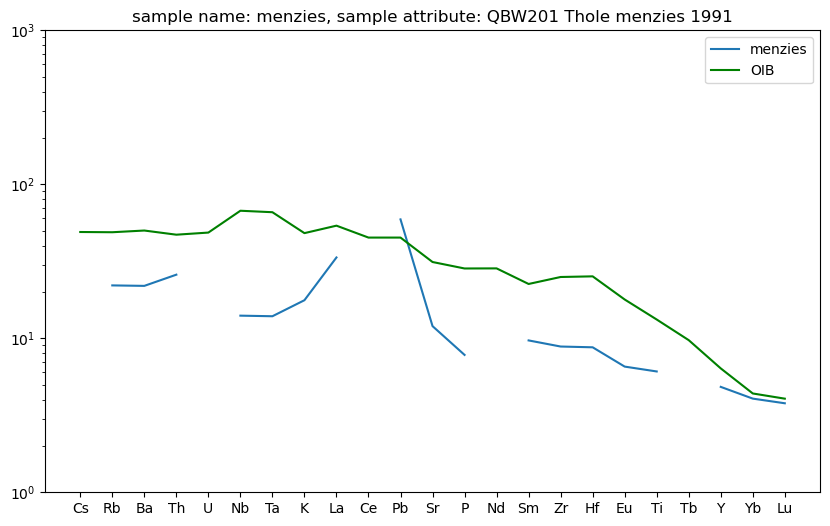

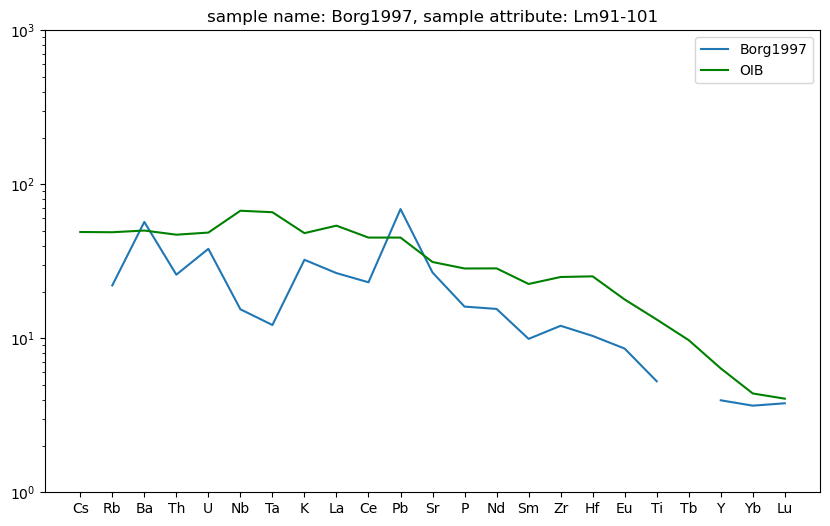

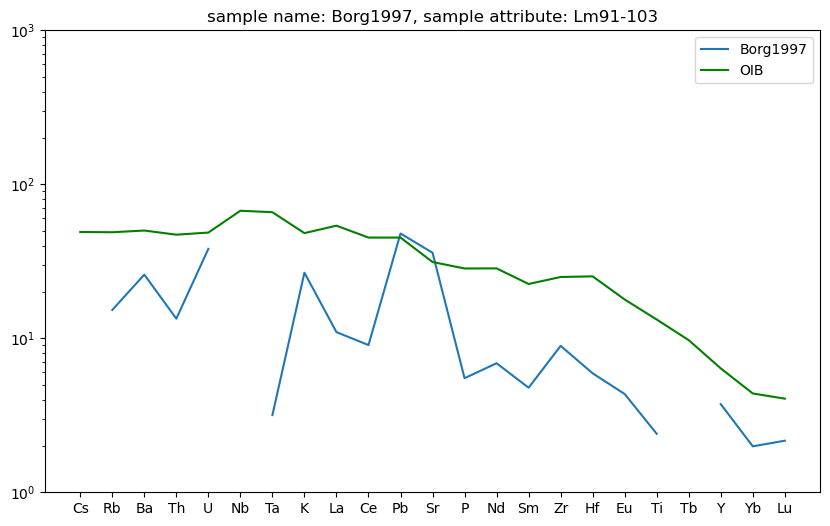

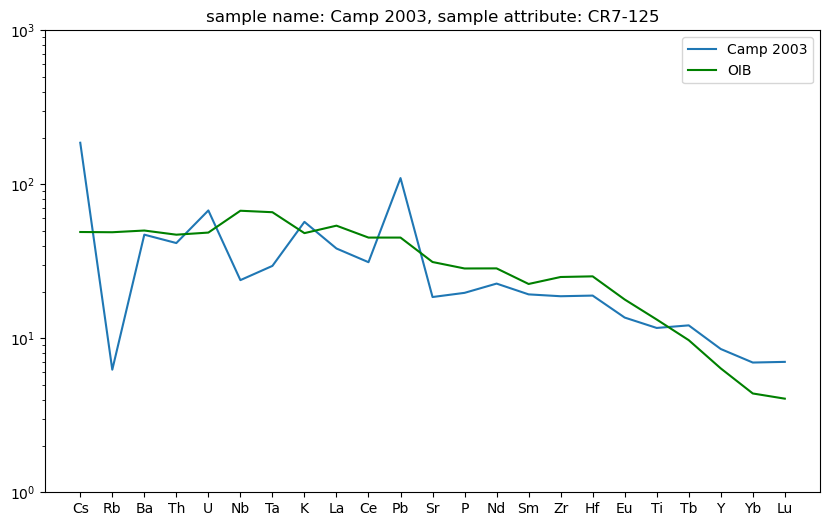

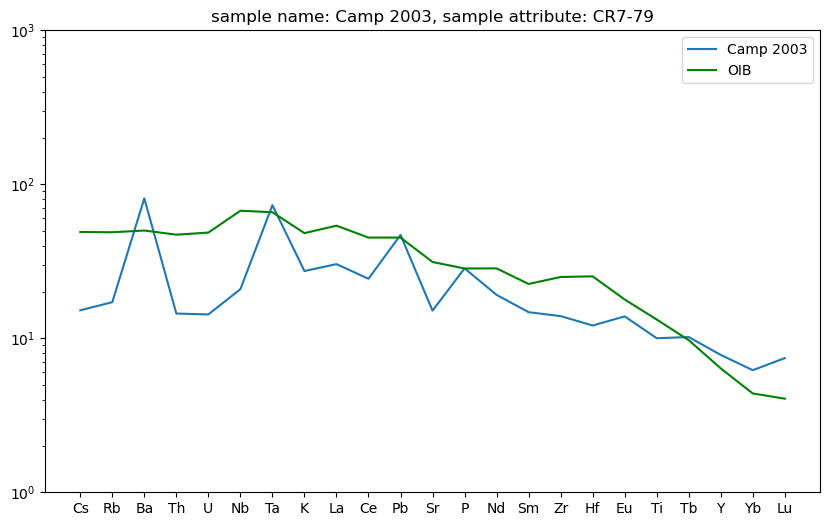

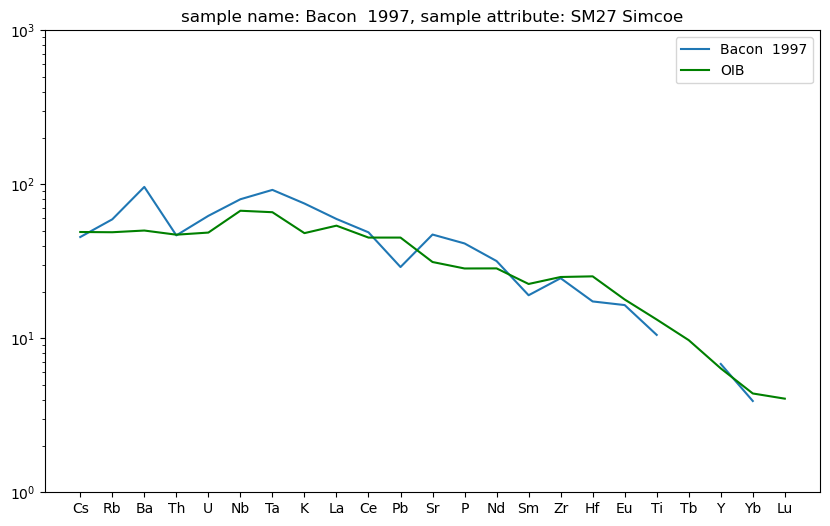

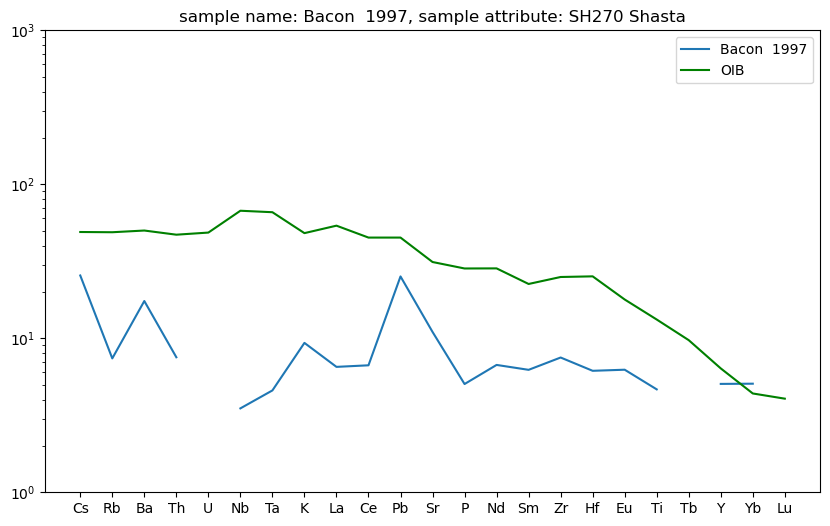

In [14]:
for i in range(normalised_df.columns.size):
    plt.figure(figsize=(10,6))
    plt.plot(dataset["Elements"], normalised_df[i], label=f"{name_row[i]}")
    plt.plot(dataset["Elements"], dataset.iloc[:,3], color="green", label="OIB") #OIB
    plt.title(f"sample name: {name_row[i]}, sample attribute: {attribute_row[i]}")
    plt.yscale('log')
    plt.ylim(1e0,1e3)
    plt.legend()
    plt.show()